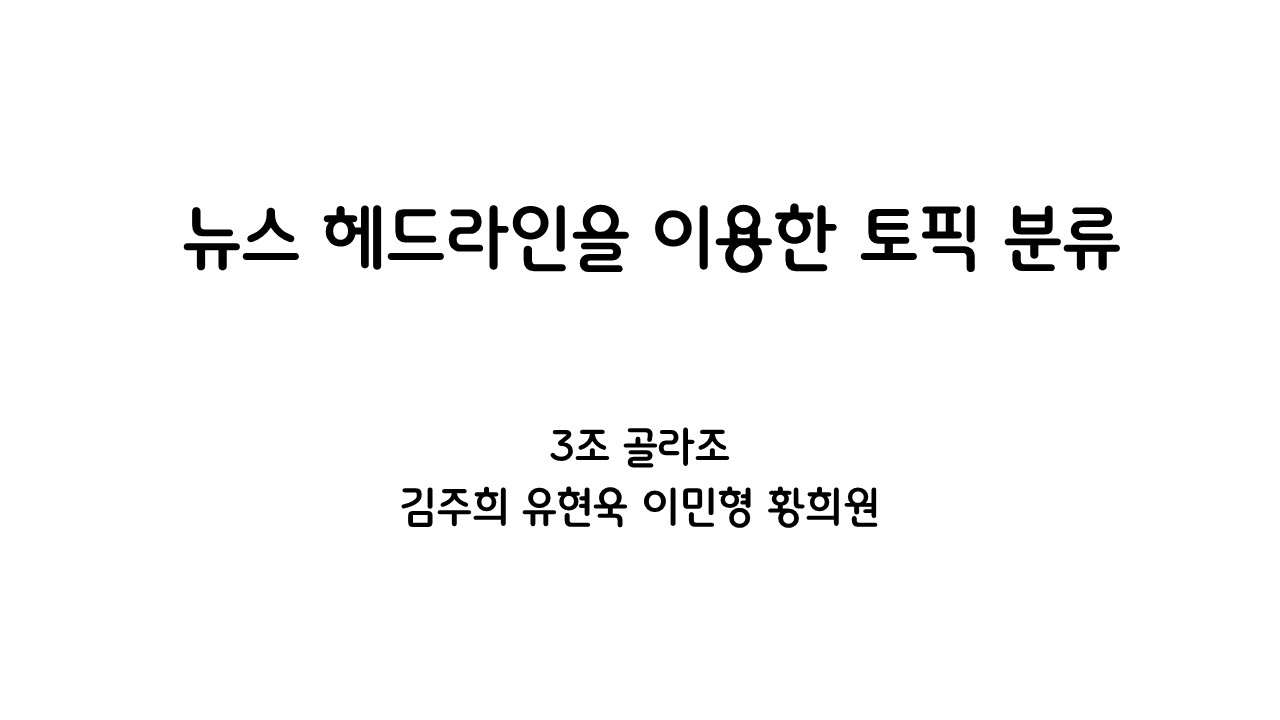

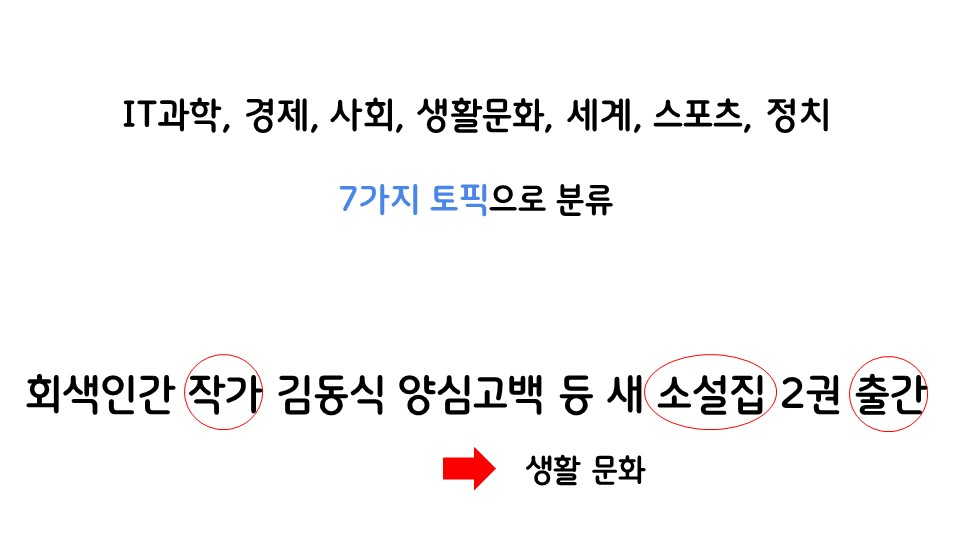

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import os, shutil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

In [ ]:
import tensorflow as tf

2022-02-28 13:37:06.247520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [ ]:
from matplotlib import font_manager, rc
font_path = '/usr/share/fonts/truetype/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 데이터 확인하기

In [ ]:
train_0=train[train.topic_idx==0]
train_1=train[train.topic_idx==1]
train_2=train[train.topic_idx==2]
train_3=train[train.topic_idx==3]
train_4=train[train.topic_idx==4]
train_5=train[train.topic_idx==5]
train_6=train[train.topic_idx==6]
train_1[500:550]

,index,title,topic_idx
4205,4205,NH투자 KTG 주가·배당 매력 두드러져,1
4208,4208,SK텔레콤 T괌·사이판패스 본격 시행,1
4215,4215,KT 아현화재 통신대란 1년…5G시대 재난 대응책 더 고민해야,1
4216,4216,STX엔진 엔진 부품판매·기자재 공급 시장 진출,1
4217,4217,특징주 성장성 특례 1호 셀리버리 코스닥 첫날 공모가 상회종합,1
4221,4221,특징주 셀트리온 첫 26만원 돌파종합,1
4222,4222,삼성바이오 비중 상위 5개 펀드 한달새 14% 손실,1
4241,4241,2025년까지 일자리 55만개…혁신성장동력 13개 선정,1
4244,4244,한은 금리 인상에 이자 부담↑…투자보다 부채관리 우선종합,1
4248,4248,소재부품 상반기 수출 1천218억달러…전년比 9.2%↓,1


In [ ]:
test=pd.read_csv('/home/lab12/data/test_data.csv')
test

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계


In [ ]:
from collections import Counter

In [ ]:
import re

## 한자

한자들 중 빈도 수가 가장 높은 순서대로 나열해보기

In [ ]:
k=[]
for i in range(0,len(train)):
  a=re.findall('[一-龥]',train['title'][i])
  if len(a)!=0:
    k=[*k,*a]

Counter(k).most_common()[:35]

[('美', 1498),
 ('北', 1329),
 ('中', 795),
 ('朴', 661),
 ('日', 467),
 ('靑', 381),
 ('與', 291),
 ('英', 285),
 ('文', 184),
 ('野', 181),
 ('獨', 138),
 ('伊', 127),
 ('韓', 109),
 ('前', 95),
 ('佛', 92),
 ('檢', 73),
 ('軍', 69),
 ('安', 63),
 ('反', 54),
 ('行', 44),
 ('南', 37),
 ('硏', 27),
 ('故', 25),
 ('外', 24),
 ('亞', 23),
 ('對', 21),
 ('銀', 19),
 ('展', 19),
 ('重', 18),
 ('株', 18),
 ('新', 17),
 ('黃', 16),
 ('企', 14),
 ('詩', 14),
 ('車', 14)]

'美'이 1498개로 가장 빈도 수가 높음을 알 수 있음

어떤 행에 어떤 한자가 들어있는지 피악하기

In [ ]:
train_han = []
for i in range(len(train)):
    result = re.findall("[一-龥]", train.title[i])
    if len(result) > 0:
        train_han.append([i, result])
train_han

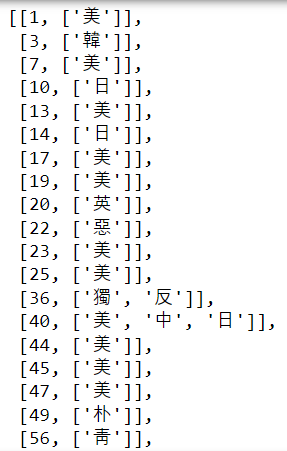

6303개의 행에 한자가 존재함을 알 수 있음

## 영어

어떤 행에 어떤 영어가 들어가는지 파악

In [ ]:
train_eng = []
for i in range(len(train)):
    result = re.findall("[a-z]|[A-Z]", train.title[i])
    if len(result) > 0:
        train_eng.append([i, result])
train_eng

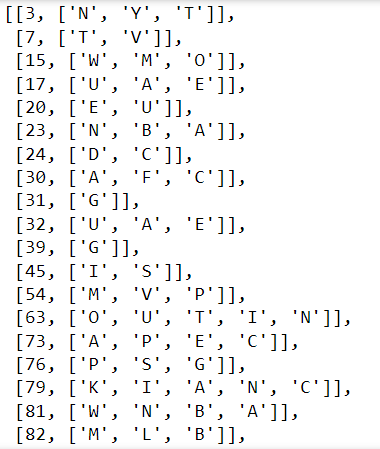

# 불용어 처리

- 트레인 데이터의 7가지 토픽을 2개씩 나누어서 불용어 처리를 진행함
- 한자들(예를 들면 文 : 문재인 대통령)은 한국어로 풀어서 변환
- 영어는 고유명사 (기업명 등) 등은 냅두되, 축약어 등은 한글로 풀어서 변환



In [ ]:
# 영어
def eng_chg(text):
    import re
    
    text = re.sub("IT", "정보기술", text)
    text = re.sub("AI", "인공지능", text)
    text = re.sub("MWC", "모바일박람회", text)
    text = re.sub("IoT", "사물인터넷", text)
    text = re.sub("VR", "가상현실", text)
    text = re.sub("CES", "소비자 가전 전시회", text)
    text = re.sub("TV", "티비", text)
    text = re.sub("SNS", "소셜 네트워크 서비스", text)
    text = re.sub("OTT", "다시보기 서비스", text)
    text = re.sub("MIT", "대학교", text)
    text = re.sub("QLED", "디스플레이", text)
    text = re.sub("OLED", "디스플레이", text)
    text = re.sub("DNA", "유전자", text)
    text = re.sub("IPO", "주식공매", text)
    text = re.sub("IDC", "인터넷데이터센터", text)
    text = re.sub("ECB", "유럽중앙은행", text)
    text = re.sub("FOMC", "연방공개시장위원회", text)
    text = re.sub("MOU", "양해각서", text)
    text = re.sub("FA", "자유계약선수제도", text)
    text = re.sub("IPU", "국제의회연맹", text)
    text = re.sub("S8", "스마트폰", text)
    text = re.sub("A7", "스마트폰", text)
    text = re.sub("갤노트9 ", "스마트폰", text)
    text = re.sub("S10", "스마트폰", text)
    text = re.sub("G6", "스마트폰", text)
    text = re.sub("아이폰X", "스마트폰", text)
    text = re.sub("V30", "스마트폰", text)
    text = re.sub("A80", "스마트폰", text)
    text = re.sub("갤노트4", "스마트폰", text)
    text = re.sub("아이폰6", "스마트폰", text)
    text = re.sub("갤노트10", "스마트폰", text)
    text = re.sub("V50", "스마트폰", text)
    text = re.sub("갤노트8", "스마트폰", text)
    text = re.sub("갤노트7", "스마트폰", text)
    text = re.sub("S9", "스마트폰", text)
    
    # 토픽 =1
    text = re.sub("M＆A", "기업 인수 및 합병", text) #500:550 4511행
    text = re.sub("BW", "신주인수권부 사채", text)
    text = re.sub("DLF", "파생결합펀드", text)
    text = re.sub("MMF", "초단기금융상품", text)
    text = re.sub("FAO", "국제연합식량농업기구", text)
    text = re.sub("2M", "해운동맹", text)
    text = re.sub("CB", "전환사채", text)
    text = re.sub("KSSQI", "한국서비스품질지수", text)
    text = re.sub("DSR", "총부채원리금상환비율", text)
    text = re.sub("MSCI", "모건스탠리캐피털인터내셔널 지수", text)
    text = re.sub("FTSE", "파이낸셜타임스 스톡익스체인지", text)
    text = re.sub("EPL", "축구", text)
    text = re.sub("SKB", "통신사", text)
    text = re.sub("DLS", "파생결합증권", text)
    text = re.sub("GDP", "국내총생산", text)
    text = re.sub("ESS", "에너지 저장 시스템", text)
    text = re.sub("PTT", "푸시 투 토크", text)
    text = re.sub("BP", "영국국영석유회사", text)
    text = re.sub("MA", "인수합병", text)
    text = re.sub("ICT", "정보통신기술", text)
    text = re.sub("ODM", "제조업자 개발생산", text)
    text = re.sub("DSC", "융복합형 디지털 스페이스 컨버전스 ", text)
    text = re.sub("인베스트먼트", "투자", text)
    text = re.sub("ETF", "상장지수펀드", text)
    text = re.sub("MWC", "모바일 박람회", text)
    text = re.sub("WTI", "서부텍사스유", text)
    text = re.sub("RD", "연구개발", text)
    text = re.sub("주택경기실사지수HBSI", "주택경기실사지수", text)
    text = re.sub("CD", "양도성예금증서", text)
    text = re.sub("PB", "금융 포트폴리오 전문가", text)
    text = re.sub("LNG", "액화천연가스", text)
    text = re.sub("IPS", "실내 위치 추적 서비스", text)
    text = re.sub("FB", "메타플랫폼", text)
    text = re.sub("ELS", "주가연계증권", text)
    text = re.sub("ELB", "주가연계파생결합사채", text)
    text = re.sub("PG", "페이먼트 게이트웨이", text)
    text = re.sub("ISA", "개인종합자산관리계좌", text)
    text = re.sub("KDI", "한국개발연구원", text)
    text = re.sub("ETP", "주식 거래", text)
    text = re.sub("ETF", "상장지수펀드", text)
    text = re.sub("ICC", "국제상업회의소", text)
    text = re.sub("CBSI", "경기실사지수", text)
    text = re.sub("BOE", "영국중앙은행", text)
    text = re.sub("FT", "파이넨셜타임즈", text)
    text = re.sub("MS", "마이크로소프트", text)
    text = re.sub("IITPKISTA", "", text)
    text = re.sub("KISA", "한국인터넷진흥원", text)
    text = re.sub("IPAF", "국제공공자산관리기구포럼", text)
    text = re.sub("ETN", "상장지수채권", text)
    text = re.sub("DSR", "총부채원리금상환비율", text)
    text = re.sub("TDF", "은퇴 자산배분 펀드", text)
    text = re.sub("CERCG", " 중국국저에너지화공집단", text)
    text = re.sub("IRP", "개인형 퇴직연금", text)
    text = re.sub("PC", "컴퓨터", text)
    text = re.sub("FDA", "식품의약국", text)
    text = re.sub("CMA", "실적배당 금융상품", text)
    text = re.sub("SW", "소프트웨어", text)
    text = re.sub("ISA", "개인종합자산관리계좌", text)
    
    
    # 토픽=6
    
    text = re.sub("IMO", "국제해사기구", text)
    text = re.sub("ITU", "국제전기통신연합", text)
    text = re.sub("TK", "대구 및 경상북도", text)
    text = re.sub("ITF", "국제태권도연맹", text)
    text = re.sub("ASEM", "아시아유럽 정상회의", text)
    text = re.sub("ICBM", "대륙간탄도미사일", text)
    text = re.sub("BH", "청와대", text)
    text = re.sub("MB", "이명박", text)
    text = re.sub("SLBM", "잠수함발사탄도미사일", text)
    text = re.sub("YS", "김영삼", text)
    text = re.sub("IOC", "국제올림픽위원회", text)
    text = re.sub("EAS", "동아시아 정상회의", text)
    text = re.sub("CEPA", "포괄적 경제동반자 협정", text)
    text = re.sub("NLL", "북방한계선", text)
    text = re.sub("NSC", "국가안전보장회의", text)
    text = re.sub("PK", "부산 및 경남", text)
    text = re.sub("SOC", "사회간접자본", text)
    text = re.sub("NGO", "비정부 기구", text)
    text = re.sub("NPDI", "핵 비확산군축 이니셔티브", text)
    text = re.sub("UAE", "아랍에미리트", text)
    text = re.sub("FTA", "자유무역협정", text)
    text = re.sub("SCM", "안보협의회의", text)
    text = re.sub("MDL", "군사분계선", text)
    text = re.sub("IDB", "은행", text)
    text = re.sub("PAC3", "패트리어트 미사일", text)
    text = re.sub("CVID", "북핵 해결의 원칙", text)
    text = re.sub("EEZ", "배타적 경제수역", text)
    text = re.sub("IPC", "국제패럴림픽위원회", text)
    text = re.sub("JP", "김종필 전 국무총리", text)
    text = re.sub("DJ", "김대중", text)
    text = re.sub("DMZ", "비무장지대", text)
    text = re.sub("ODA", "정부개발원조", text)
    text = re.sub("APEC", "아시아태평양경제협력체", text)
    text = re.sub("AU", "아프리카연합", text)
    text = re.sub("GPS", "지피에스", text)
    text = re.sub("CB", "전환사채", text)
    text = re.sub("LG", "엘지", text)
    text = re.sub("KT", "통신사", text)
    text = re.sub("KAIST", "대학교", text)
    text = re.sub("MWC", "모바일박람회", text)
    text = re.sub("LGU", "통신사", text)
    text = re.sub("IBM", "아이비엠", text)
    text = re.sub("IoT", "사물인터넷", text)
    text = re.sub("CJ", "씨제이", text)
    text = re.sub("SK", "에스케이", text)
    text = re.sub("SKT", "통신사", text)
    text = re.sub("DNA", "유전자", text)
    text = re.sub("CEO", "대표", text)    
    text = re.sub("MBC", "방송사", text)
    text = re.sub("SBS", "방송사", text)
    text = re.sub("KBS", "방송사", text)
    text = re.sub("JTBC", "방송사", text)
    text = re.sub("EBS", "방송사", text)  
    text = re.sub("CBS", "방송사", text)
    text = re.sub("OBS", "방송사", text)
    text = re.sub("YTN", "방송사", text)
    text = re.sub("MBN", "방송사", text)    
    text = re.sub("SW", "소프트웨어", text)
    text = re.sub("PD", "감독", text)
    text = re.sub("CCTV", "씨씨티비", text)
    text = re.sub("MOU", "양해각서", text)
    text = re.sub("HSK", "중국어시험", text)
    text = re.sub("MS", "마이크로소프트", text)
    text = re.sub("KIST", "한국과학기술연구원", text)
    text = re.sub("NH", "농협", text)
    text = re.sub("KTX", "기차", text)
    text = re.sub("ATM", "현금 자동 입출금기", text)
    text = re.sub("IPTV", "인터넷 티비", text)
    text = re.sub("OECD", "경제협력개발기구", text)    
    text = re.sub("GS", "지에스", text)
    text = re.sub("IBK", "은행", text)
    text = re.sub("DMZ", "비무장 지대", text)
    text = re.sub("OANA", "아시아 뉴스 연합", text)
    text = re.sub("URL", "웹 주소", text)
    text = re.sub("PPL", "간접광고", text)    
    text = re.sub("SFTS", "중증열성혈소판감소증후군", text)
    text = re.sub("ETRI", "한국전자통신연구원", text)
    text = re.sub("VOD", "비디오", text)
    text = re.sub("CES", "소비자 가전 전시회", text)
    text = re.sub("DOI", "디지털 객체 식별자", text)
    text = re.sub("UNIST", "대학교", text)
    text = re.sub("IBS", "기초 과학 연구원", text)
    # topic 4
    
    text = re.sub("NYT", "외신", text)
    text = re.sub("WMO", "세계 기상 기구", text)
    text = re.sub("EU", "유럽 연합", text)
    text = re.sub("NBA", "농구", text)
    text = re.sub("AFC", "축구", text)
    text = re.sub("ECB", "유럽중앙은행", text)
    text = re.sub("TPP", "환태평양 경제 동반자 협정", text)
    text = re.sub("WP", "외신", text)
    text = re.sub("EAS", "동아시아정상회의", text)
    text = re.sub("NSG", "원자력공급국그룹", text)
    text = re.sub("F35", "전투기", text)
    text = re.sub("B52", "폭격기", text)
    text = re.sub("F22", "전투기", text)
    text = re.sub("NGO", "비정부 기구", text)
    text = re.sub("CIA", "중앙정보국", text)
    text = re.sub("F16", "전투기", text)
    text = re.sub("MLB", "야구", text)
    text = re.sub("PSG", "축구", text)
    text = re.sub("WSJ", "외신", text)
    text = re.sub("INF", "중거리 핵전력 조약", text)
    text = re.sub("WFP", "세계 식량 계획", text)
    text = re.sub("RCEP", "역내 포괄적 경제 동반자 협정", text)
    text = re.sub("TPP", "환태평양 경제 동반자 협정", text)
    text = re.sub("ICC", "국제형사재판소", text)
    text = re.sub("B1B", "폭격기", text)
    text = re.sub("ICBM", "대륙간 탄도 미사일", text)
    text = re.sub("IAEA", "국제 원자력 기구", text)
    text = re.sub("ZTE", "중흥통신", text)
    text = re.sub("IMF", "국제 통화 기금", text)
    text = re.sub("CNN", "외신", text)
    text = re.sub("AFP", "외신", text)
    text = re.sub("ISIS", "과학국제안보연구소", text)
    text = re.sub("IOC", "국제 올림픽 위원회", text)
    text = re.sub("ANC", "아프리카 국민회의", text)
    text = re.sub("WTO", "세계무역기구", text)
    text = re.sub("BBC", "외신", text)
    text = re.sub("PMI", "구매 관리자 지수", text)
    text = re.sub("WTI", "서부 텍사스 중질유", text)
    text = re.sub("WHO", "세계보건기구", text)
    text = re.sub("ICC", "국제 상업 회의소", text)
    text = re.sub("FIFA", "국제 축구 연맹", text)
    text = re.sub("RFA", "외신", text)
    text = re.sub("KISTEP", "한국과학기술기획평가원", text)
    text = re.sub("SCO", "상하이 협력 기구", text)
    text = re.sub("ICJ", "국제사법재판소", text)
    text = re.sub("RFE", "외신", text)
    text = re.sub("SCMP", "외신", text)
    text = re.sub("GDP", "국내총생산", text)
    text = re.sub("ICC", "국제 상업 회의소", text)
    text = re.sub("NSC", "국가안전보장회의", text)
    text = re.sub("UFO", "미확인비행물체", text)
    text = re.sub("OPEC", "석유 수출국 기구", text)
    text = re.sub("IFA", "베를린 국제가전박람회", text)
    text = re.sub("EPA", "경제 협력 협정", text)
    text = re.sub("CBS", "외신", text)
    text = re.sub("DNI", "국가정보장", text)
    text = re.sub("SLBM", "잠수함 발사 탄도 미사일", text)
    text = re.sub("NPT", "핵확산방지조약", text)
    text = re.sub("MTCR", "미사일 기술 통제 체제", text)
    text = re.sub("H7N9", "인플루엔자 바이러스", text)
    text = re.sub("CSIS", "전략국제연구센터", text)
    text = re.sub("OAS", "미주 기구", text)
    text = re.sub("FAO", "유엔식량농업기구", text)
    text = re.sub("CNN", "외신", text)
    text = re.sub("STC", "사우디 텔레콤 컴퍼니", text)
    text = re.sub("MS", "마이크로소프트", text)
    text = re.sub("IBM", "정보기술 기업", text)
    text = re.sub("LGBT", "성소수자", text)
    text = re.sub("AP", "외신", text)
    text = re.sub("UCLA", "대학교", text)
    text = re.sub("USC", "대학교", text)
    text = re.sub("SNP", "스코틀랜드 국민당", text)
    text = re.sub("USMCA", "자유무역협정", text)
    text = re.sub("BIFF", "부산국제영화제", text)
    text = re.sub("FTC", "연방거래위원회", text)
    text = re.sub("ECJ", "유럽사법재판소", text)
    text = re.sub("INF", "중거리 핵전력 협정", text)
    text = re.sub("FOMC", "연방공개시장위원회", text)
    text = re.sub("RCEP", "역내포괄적경제동반자협정", text)
    text = re.sub("OPEC", "석유수출국기구", text)
    text = re.sub("G20", "진·신흥 20개국의 재무장관 및 중앙은행 총재 회의", text)
    text = re.sub("NBC", "외신", text)
    text = re.sub("MSNBC", "외신", text)
    text = re.sub("NSW", "뉴사우스웨일스 주", text)
    text = re.sub("SNL", "예능방송", text)
    text = re.sub("NHK", "외신", text)
    text = re.sub("USTR", "미국 통상 대표부", text)
    text = re.sub("CNBC", "외신", text)
    text = re.sub("OIC", "이슬람제국회의기구", text)
    text = re.sub("FBI", "미국 연방 수사국", text)
    text = re.sub("LCD", "액정 화면", text)
    text = re.sub("WSL", "월드서프리그", text)
    text = re.sub("SICAF", "서울 국제 만화 애니메이션 페스티벌", text)
    
    return text

In [ ]:
def word_delete(title):
    delete_word = [
        "1보",
        "2보",
        "3보",
        "4보",
        "5보",
        "속보",
        "사진",
        "게시판",
        "주말 N",
        "QA",
        "그래픽",
        "국내",
        "동정",
        "속보",
        "위클리",
        "주간 화제의 뉴스",
        "카드뉴스",
        "팩트체크",
        "WSJ",
        "49호",
        "특징주",
        "VOA",
        "데일리NK",
        "RFA",
        "NHK"
    ]
    for i in delete_word:
        if title.endswith(i) or title.startswith(i):
            title = title.replace(i, "")
    if title.endswith("종합"):
        title = title[:-2]
    title = title.replace("↑", " 증가")
    title = title.replace("↓", " 감소")
    title = title.replace("→", "에서 ")
    title = title.replace("~", "에서 ")
    title = title.replace("...", ". ")
    title = title.replace("·", " 및 ")
    title = title.replace(":", " 대 ")
    title = title.upper()
    return title


def chinese_char(text):
    import re

    # 2단어 이상
    text = re.sub("外人", "외국사람", text)
    text = re.sub("詩人", "시인", text)
    text = re.sub("日人", "일본사람", text)
    if re.search(r"[0-9]人", text):
        text = re.sub("人", "명", text)
    text = re.sub("人", "사람", text)
    text = re.sub("中企", "중소기업", text)
    text = re.sub("令和", "", text)
    text = re.sub("不備", "준비 안되다.", text)
    text = re.sub("印尼", "인도네시아", text)
    text = re.sub("반反", "반대", text)
    text = re.sub("부富", "재산", text)
    text = re.sub("^書香萬里", "", text)
    text = re.sub("最古", "가장 오래된", text)
    text = re.sub("^社告", "", text)
    text = re.sub("對野", "야당", text)
    text = re.sub("氷魚", "", text)
    text = re.sub("眞朴", "박근혜와 친한", text)
    text = re.sub("非朴", "박근혜와 반대", text)
    text = re.sub("破七", "", text)
    text = re.sub("私黨", "개인의 당", text)
    text = re.sub("親朴", "박근혜와 친한", text)
    text = re.sub("邪敎", "사이비 종교", text)
    if re.search("[가-핳]銀", text):
        text = re.sub("銀", "은행", text)
    text = re.sub("非文", "문재인 반대", text)
    text = re.sub("四體", "", text)
    text = re.sub("潘風", "반기문 세력", text)
    text = re.sub("駐英", "영국 주재원", text)
    text = re.sub("高法", "고등법원", text)

    # 개별 단어
    text = re.sub("丁", "정세균", text)  # 사람의 성씨 지금은 정세균 국회의장 #3
    text = re.sub("七", "칠", text)  # 사람이름으로 사용됨 괄호 안에 #1
    text = re.sub("三", "삼", text)  # 3색으로 사용된 괄호 안에 #1
    text = re.sub("中", "중국", text)  # 중국 #771
    text = re.sub("乙", "을", text)  # 차선의 의미, 을말고 다른 단어를 사용하는 것이 좋아보임 #2
    text = re.sub("亞", "아시아", text)  # 23
    text = re.sub(
        "人", "명", text
    )  # 숫자人 : 명, 한글人 : 사람(국석기人), 外人 : 외국인, 詩人 : 시인, 日人 : 일본인 #13
    text = re.sub("仙", "선", text)  # 神仙 : 신선 #1
    text = re.sub("代", "대", text)  # 대를 잇다, 숫자代 : 10대
    text = re.sub("令", "령", text)  # 일본 연호 레이와(令和)에 사용 #1 # 명령에도 사용
    text = re.sub("企", "기", text)  # 中企 : 중소기업 으로 사용됨 모두 다 #14
    text = re.sub("伊", "이탈리아", text)  # 127
    text = re.sub("佛", "프랑스", text)  # 90
    text = re.sub("備", "비", text)  # 不備 : 불비, 갖추지않음
    text = re.sub("先", "먼저", text)  # 7
    text = re.sub("內", "안에", text)  # 지역內 : 어디안에 #1
    text = re.sub("全", "전체", text)  # 3
    text = re.sub("分", "당을 나누다.", text)  # 당을 나누다 #3 分黨: 분당
    text = re.sub("前", "이전", text)  # 이전 #94
    text = re.sub("北", "북한", text)  # 1293
    text = re.sub("千", "천정배", text)  # 국민의 당 천정배 #7
    text = re.sub("協", "협회", text)  # 화합할 협 #2
    text = re.sub("南", "한국", text)  # 36
    text = re.sub("印", "인도", text)  # 印尼 : 인도네시아 # 8(7,1)
    text = re.sub("反", "반대", text)  # 반反 -> 반(反)로 추정 #52
    text = re.sub("古", "오래된", text)  # 最古 -> 최고 # 1
    text = re.sub("史", "역사", text)  # 3
    text = re.sub("告", "고", text)  # 社告 -> 사고(회사광고) 맨 앞에 게시판 처럼 나옴 삭제필 # 2
    text = re.sub("和", "통합", text)  # 1개는 통합 나머지 하나는 令和(일본 연호) # 2
    text = re.sub("四", "4", text)  # 四體 -> 4가지 글씨체 # 1
    text = re.sub("在", "", text)  # 뭔의미인지 모르겠음 在伊 -> 뜻이 안나옴 # 1
    text = re.sub(
        "外", "외", text
    )  # 단독: ~외 몇건 삭제 필, 外人 : 외인 기사 맨앞(게시판)으로 사용 되거나 외국인으로 사용됨 삭제해도 무방할듯 # 24
    text = re.sub("大", "대학교", text)  # 大戰 : 대결, 大寒 : 절기 중 대한
    text = re.sub("妻", "부인", text)  # 1
    text = re.sub("委", "워원회", text)  # 7
    text = re.sub("子", "아들", text)  # 1
    text = re.sub("孫", "손학규", text)  # 손학규 # 14
    text = re.sub("安", "안철수", text)  # 안철수 # 61
    text = re.sub("家", "집안", text)  # 가문 주로 기업뒤에 붙어 사용 # 6
    text = re.sub("富", "재산", text)  # 재산 부富 -> 부(富) # 2
    text = re.sub("寒", "한", text)  # 절기 대한 # 1
    text = re.sub("對", "대결", text)  # 對野 대야 대야당 # 21
    text = re.sub("小", "", text)  # 작다 #1 삭제무방
    text = re.sub("尹", "윤석열", text)  # 윤석열 # 2
    text = re.sub("尼", "", text)  # 인도네시아 뒷 글자 # 2
    text = re.sub("展", "전시회", text)  # 19
    text = re.sub("山", "산", text)  # 1
    text = re.sub("島", "섬", text)  # 1
    text = re.sub("崔", "최순실", text)  # 최순실 # 4
    text = re.sub("州", "도시", text)  # 미국의 주, 시나 도시로 변경 # 4
    text = re.sub("巨", "큰", text)  # 巨野 거야(큰야당) 로 사용 # 2
    text = re.sub("市", "도시", text)  # 도시 # 1
    text = re.sub("式", "방식", text)  # 방법 # 1
    text = re.sub("弗", "달러", text)  # 돈, 달러 # 8
    text = re.sub("强", "강하다", text)  # 1
    text = re.sub("後", "뒤", text)  # 4
    text = re.sub("心", "마음", text)  # 4
    text = re.sub("情", "정", text)  # 1
    text = re.sub("惡", "악", text)  # 2
    text = re.sub("戰", "전투", text)  # 大戰로 사용됨 모두 # 2
    text = re.sub("政", "정부", text)  # 1
    text = re.sub("故", "", text)  # 죽은 사람 삭제해도 될듯 # 25
    text = re.sub("敎", "종교", text)  # 1
    text = re.sub("文", "문재인", text)  # 181
    text = re.sub("料", "요금", text)  # 1
    text = re.sub("新", "새로운", text)  # 17
    text = re.sub("日", "일본", text)  # 460
    text = re.sub("書", "서", text)  # 書香萬里 로 기사 제목 앞에 사용됨(게시판) # 2
    text = re.sub(
        "曺", "조국 법무부장관", text
    )  # 조국 # 11 조국이라는 이름이 나라라는 뜻이 있을 수 있어 다른 방법의 치환이 필요해 보임
    text = re.sub("最", "최", text)  # 最古 # 1
    text = re.sub("月", "한 달", text)  # 5
    text = re.sub("朴", "박근혜", text)  # 박근혜 # 659
    text = re.sub("株", "주식", text)  # 18
    text = re.sub("核", "핵폭탄", text)  # 3
    text = re.sub("案", "안건", text)  # 2
    text = re.sub("機", "기계", text)  # 1
    text = re.sub("檢", "검찰", text)  # 73
    text = re.sub("比", "대비", text)  # 12
    text = re.sub("氣", "기", text)  # 2
    text = re.sub("氷", "빙", text)  # 氷魚 삭제해도 될듯 # 1
    text = re.sub("江", "강", text)  # 1
    text = re.sub("法", "법", text)  # 7
    text = re.sub("洪", "홍경영", text)  # 정치인 # 2
    text = re.sub("海", "해", text)  # 西海 서해 # 1
    text = re.sub("港", "항구", text)  # 1
    text = re.sub("湖", "호수", text)  # 1
    text = re.sub("潘", "반기문", text)  # 8
    text = re.sub("無", "없다", text)  # 9
    text = re.sub("煎", "전", text)  # 花煎 화전 # 1 삭제
    text = re.sub("燈", "조명", text)  # 2
    text = re.sub("父", "아버지", text)  # 3
    text = re.sub("獨", "독일", text)  # 137
    text = re.sub("王", "왕", text)  # 1
    text = re.sub("現", "현재", text)  # 1
    text = re.sub("生", "삶", text)  # 1
    text = re.sub("申", "신", text)  # 2 # 삭제도 가능
    text = re.sub("男", "남자", text)  # 11
    text = re.sub("發", "발생", text)  # 7
    text = re.sub("百", "백화점", text)  # 6
    text = re.sub("眞", "진", text)  # 眞朴 : 박근혜와 친한, 非朴 # 박근혜 반대 # 2
    text = re.sub("知", "", text)  # 1 # 삭제
    text = re.sub("破", "포", text)  # 破七 사람이름 삭제 # 1
    text = re.sub("硏", "연구소", text)  # 27
    text = re.sub("社", "회사", text)  # 社告 는 삭제 # 5
    text = re.sub("神", "신", text)  # 神仙 # 1
    text = re.sub("禹", "우병우", text)  # 정치인 11
    text = re.sub("私", "사", text)  # 사적인 私黨: 사당 개인의 당 # 1
    text = re.sub("秋", "추미애", text)  # 정치인 # 9
    text = re.sub("稅", "세금", text)  # 1
    text = re.sub("空", "공", text)  # 空約 공약 # 1
    text = re.sub("童", "동", text)  # 아이 童心 동심 # 1
    text = re.sub("約", "약", text)  # 空約 공약 # 1
    text = re.sub("美", "미국", text)  # 1467
    text = re.sub("脫", "벗어난", text)  # 탈 # 3
    text = re.sub("臺", "대만", text)  # 1
    text = re.sub("與", "여당", text)  # 290
    text = re.sub("舊", "구", text)  # 예전 # 1
    text = re.sub("色", "색", text)  # 5
    text = re.sub("花", "화", text)  # 삭제 화전
    text = re.sub("英", "영국", text)  # 283
    text = re.sub("茶", "차", text)  # 삭제 # 1
    text = re.sub("萬", "만", text)  # 書香萬里 삭제
    text = re.sub("號", "팀", text)  # 12
    text = re.sub("行", "행", text)  # 삭제도 가능 할 듯 # 44
    text = re.sub("西", "서", text)  # 西海 서해 1
    text = re.sub("親", "친한", text)  # 親朴 친박 친한 박근혜 # 13
    text = re.sub("詩", "시", text)  # 시조 도 좋을 듯 # 14
    text = re.sub("誌", "지", text)  # 1
    text = re.sub("說", "가설", text)  # 1
    text = re.sub("論", "논의", text)  # 2
    text = re.sub("證", "증권", text)  # 7
    text = re.sub("賞", "상", text)  # 1
    text = re.sub("趙", "조윤선", text)  # 정치인 # 1
    text = re.sub("車", "자동차", text)  # 14
    text = re.sub("軍", "군대", text)  # 69
    text = re.sub("通", "통화", text)  # 1
    text = re.sub("道", "도로", text)  # 1
    text = re.sub("選", "선별", text)  #  1
    text = re.sub("邪", "사", text)  # 邪敎 사이비 종교
    text = re.sub("鄭", "정진석", text)  # 정치인 # 1
    text = re.sub("酒", "주", text)  # 삭제 # 1
    text = re.sub("醫", "의사 협회", text)  # 1
    text = re.sub("里", "리", text)  # 書香萬里 삭제 # 2
    text = re.sub("重", "중공업", text)  # 18
    text = re.sub("野", "야당", text)  # 180
    text = re.sub("金", "김정은", text)  # 북한 머리 # 12
    text = re.sub("銀", "은메달", text)  # 18 # 은행 하나銀, 은메달 銀
    text = re.sub("銅", "동메달", text)  # 2
    text = re.sub("阿", "아시아", text)  # 2
    text = re.sub("院", "구성원", text)  # 2
    text = re.sub("靑", "청와대", text)  # 377
    text = re.sub("非", "아닌", text)  # 非文 : 문제인 반대, 非朴 : 박근혜 반대
    text = re.sub("韓", "한국", text)  # 109
    text = re.sub("風", "세력", text)  # 潘風 : 반기문 세력, # 6
    text = re.sub("香", "", text)  # 書香萬里 삭제 # 2
    text = re.sub("駐", "주재원", text)  # 駐英 : 영국 주재원 # 8
    text = re.sub("體", "체", text)  # 四體 삭제 # 1
    text = re.sub("高", "높은", text)  # 高法 : 고등법원 # 3
    text = re.sub("魚", "어", text)  # 빙어 삭제 # 1
    text = re.sub("黃", "황교안", text)  # 정치인 # 16
    text = re.sub("黨", "정당", text)  # 13
    
    return text


# 불필요한 텍스트 제거
def clean_text(title):
    title_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9\\s.%]", " ", title)
    
    title_clean = re.sub(" +", " ", title_clean)
    title_clean = title_clean.strip()
    return title_clean


In [ ]:
def word_eda(text):
    text = eng_chg(text)
    text = chinese_char(text)
    text = clean_text(text)
    text = word_delete(text)    
    return text

## train 데이터 토크나이징

In [ ]:
train["title"] = train["title"].apply(word_eda)

In [ ]:
train

,index,title,topic_idx
0,0,인천 핀란드 항공기 결항 휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다 구글 15조원 들여 미국전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,외신 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴 선진국 시장 공략,1
45650,45650,서울시교육청 신종코로나 확산에 개학 연기 휴업 검토,2
45651,45651,키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2


In [ ]:
del train['index']

train

,title,topic_idx
0,인천 핀란드 항공기 결항 휴가철 여행객 분통,4
1,실리콘밸리 넘어서겠다 구글 15조원 들여 미국전역 거점화,4
2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,외신 클린턴 측근한국기업 특수관계 조명 공과 사 맞물려,4
4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...
45649,KB금융 미국 IB 스티펠과 제휴 선진국 시장 공략,1
45650,서울시교육청 신종코로나 확산에 개학 연기 휴업 검토,2
45651,키움증권 2020 키움 영웅전 실전투자대회,1
45652,답변하는 배기동 국립중앙박물관장,2


In [ ]:
train1=train.values.tolist()

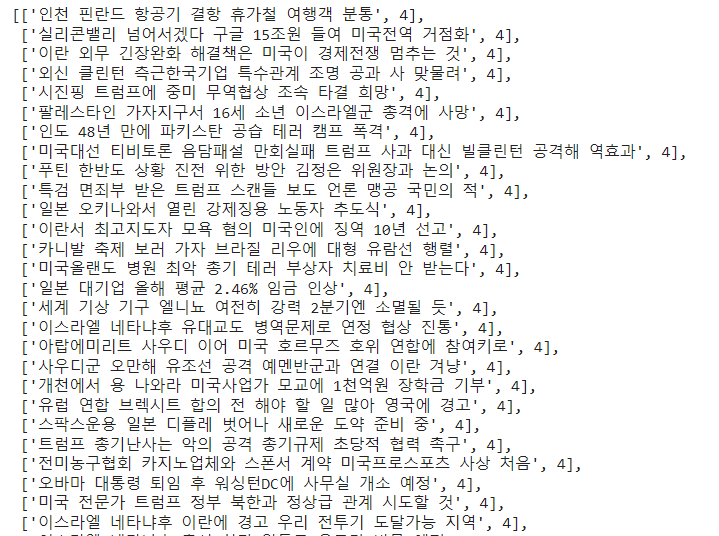

In [ ]:
!pwd

/home/lab12


In [ ]:
stopwords = []
with open('/home/lab12/data/stopwords.txt') as f:
    stopwords = [ line.split('\n')[0] for line in f.readlines() ]
stopwords[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

In [ ]:
# 한글에서 사용할 수 있는 형태소 분석기
from konlpy.tag import Kkma, Komoran, Okt, Hannanum, Mecab

In [ ]:
kkma = Kkma()
komoran = Komoran()
han = Hannanum()

okt = Okt()

In [ ]:
train_token = []
for line in train1:
    pre = [word for word in okt.morphs( line[0], stem=True, norm=True ) if word not in stopwords and len(word) > 1]
    train_token.append( [pre, line[1]] )

In [ ]:
train_token[0:100]

[[['인천', '핀란드', '항공기', '결항', '휴가', '여행객', '분통'], 4],
 [['실리콘밸리', '넘어서다', '구글', '15조원', '미국', '전역', '거점'], 4],
 [['이란', '외무', '긴장', '완화', '해결', '미국', '경제', '전쟁'], 4],
 [['외신', '클린턴', '측근', '한국', '기업', '특수', '관계', '조명', '공과', '물리다'], 4],
 [['시진핑', '트럼프', '중미', '무역', '협상', '조속', '타결', '희망'], 4],
 [['팔레스타인', '가자지구', '소년', '이스라엘군', '총격', '사망'], 4],
 [['인도', '48년', '파키스탄', '공습', '테러', '캠프', '폭격'], 4],
 [['미국',
   '대선',
   '티비',
   '토론',
   '음담패설',
   '만회',
   '실패',
   '트럼프',
   '사과',
   '빌다',
   '클린턴',
   '공격',
   '역효과'],
  4],
 [['푸틴', '한반도', '상황', '진전', '방안', '김정은', '위원장', '논의'], 4],
 [['특검', '면죄부', '트럼프', '스캔들', '보도', '언론', '맹공', '국민'], 4],
 [['일본', '오키나와', '강제', '징용', '노동자', '추도'], 4],
 [['이란', '지도자', '모욕', '혐의', '미국인', '징역', '선고'], 4],
 [['카니발', '축제', '브라질', '리우', '대형', '유람선', '행렬'], 4],
 [['미국', '올랜도', '병원', '최악', '총기', '테러', '부상', '치료'], 4],
 [['일본', '대기업', '평균', '2.46%', '임금', '인상'], 4],
 [['세계', '기상', '기구', '엘니뇨', '강력', '기엔', '소멸'], 4],
 [['이스라엘', '네타냐후', '유대교도', '병역', '문제', '연정', '

In [ ]:
train_0["title"] = train_0["title"].apply(word_eda)
del train_0['index']
train_0=train_0.values.tolist()
train0_token = []
for line in train_0:
    pre = [word for word in okt.morphs( line[0], stem=True, norm=True ) if word not in stopwords and len(word) > 1]
    train0_token.append( [pre, line[1]] )

In [ ]:
train_1["title"] = train_1["title"].apply(word_eda)
del train_1['index']
train_1=train_1.values.tolist()
train1_token = []
for line in train_1:
    pre = [word for word in okt.morphs( line[0], stem=True, norm=True ) if word not in stopwords and len(word) > 1]
    train1_token.append( [pre, line[1]] )

In [ ]:
train_2["title"] = train_2["title"].apply(word_eda)
del train_2['index']
train_2=train_2.values.tolist()
train2_token = []
for line in train_2:
    pre = [word for word in okt.morphs( line[0], stem=True, norm=True ) if word not in stopwords and len(word) > 1]
    train2_token.append( [pre, line[1]] )

In [ ]:
train_3["title"] = train_3["title"].apply(word_eda)
del train_3['index']
train_3=train_3.values.tolist()
train3_token = []
for line in train_3:
    pre = [word for word in okt.morphs( line[0], stem=True, norm=True ) if word not in stopwords and len(word) > 1]
    train3_token.append( [pre, line[1]] )

In [ ]:
train_4["title"] = train_4["title"].apply(word_eda)
del train_4['index']
train_4=train_4.values.tolist()
train4_token = []
for line in train_4:
    pre = [word for word in okt.morphs( line[0], stem=True, norm=True ) if word not in stopwords and len(word) > 1]
    train4_token.append( [pre, line[1]] )

In [ ]:
train_5["title"] = train_5["title"].apply(word_eda)
del train_5['index']
train_5=train_5.values.tolist()
train5_token = []
for line in train_5:
    pre = [word for word in okt.morphs( line[0], stem=True, norm=True ) if word not in stopwords and len(word) > 1]
    train5_token.append( [pre, line[1]] )

In [ ]:
train_6["title"] = train_6["title"].apply(word_eda)
del train_6['index']
train_6=train_6.values.tolist()
train6_token = []
for line in train_6:
    pre = [word for word in okt.morphs( line[0], stem=True, norm=True ) if word not in stopwords and len(word) > 1]
    train6_token.append( [pre, line[1]] )

In [ ]:
train0_token[0:10]

[[['바이러스', '규명', '전자현미경', '연구', '유용'], 0],
 [['증강현실', '알파', '포켓몬', '정보기술', '광풍'], 0],
 [['인공', '지능', '월드컵', '현장', '중계'], 0],
 [['이세돌', '알파', '집중', '사람', '일문일답'], 0],
 [['휴대폰', '국내', '생산', '전의', '18.4%'], 0],
 [['LG', '노트', '티저', '광고', '선전포고'], 0],
 [['스카이라이프', '알뜰폰', '판매', '전용', '출시'], 0],
 [['티비', '주파수', '농어촌', '무선인터넷'], 0],
 [['과학', '과학', '행사', '여건'], 0],
 [['정통부', '실험실', '창업', '사업', '공모', '93억원', '규모'], 0]]

In [ ]:
train1_token[0:10]

[[['아파트', '관리', '경기', '556', '150억', '비리', '적발'], 1],
 [['관리종목', '대우조선', '해양', '강세'], 1],
 [['강원랜드', '실적', '부진', '급락'], 1],
 [['라면', '수출', '질주', '4억달러', '돌파', '실시'], 1],
 [['경기', '지표', '부진', '골드만삭스', '금리', '인상', '예상', '시기'], 1],
 [['페이스북', '가상', '화폐', '관심', '중국', '결제', '시장', '선점'], 1],
 [['KGP', '주주', '투자', '변경'], 1],
 [['유니', '테스트', 'SK', '하이닉스', '반도체', '장비', '공급', '계약'], 1],
 [['농협', '엔터', '영업', '99억원', '4.1%'], 1],
 [['국내', '선사', '발주', '중국', '수주', '한국'], 1]]

In [ ]:
train2_token[0:10]

[[['드라마', '제작', '환경', '개선', '촉구'], 2],
 [['창원', '세계', '사격', '회장', '경남', '관광', '세계'], 2],
 [['조배숙', '중앙', '정례', '회의', '주재'], 2],
 [['인천공항', '송도', '택시', '요금', '12만원', '바가지', '택시', '콜밴'], 2],
 [['조용중', '연합뉴스', '사장', '별세'], 2],
 [['노웅래', '출판', '블랙리스트', '배제', '도서'], 2],
 [['제주', '성산', '일출', '축제', '인공', '지능', '확산', '취소'], 2],
 [['입장', '발표', '방화', '흉기', '난동', '희생', '유족'], 2],
 [['한국', '방송', '협회', '지상파', '신뢰', '회복', '최선'], 2],
 [['현대', '기아차', '수해', '차량', '무상', '점검', '특별', '지원'], 2]]

In [ ]:
train3_token[0:10]

[[['황석영', '작가', '미국', '문학', '축제', '국문학'], 3],
 [['휴일', '불청객', '울산', '미세먼지', '주의보', '발령'], 3],
 [['김수영', '신임', '한국', '출판', '문화', '산업', '진흥'], 3],
 [['신간', '한반도', '평화', '오디세이'], 3],
 [['가극', '금강', '낭독', '공연', '간담'], 3],
 [['인스타', '스토리', '사진', '동영상'], 3],
 [['아르헨티나', '중남미', '대회', '개팀', '참가'], 3],
 [['춘천', '드론', '체험', '명소', '드론', '페스티벌', '개최'], 3],
 [['무덥다', '주말', '충북', '북적'], 3],
 [['15회', '서강', '언론인', '시상식'], 3]]

In [ ]:
train4_token[0:10]

[[['인천', '핀란드', '항공기', '결항', '휴가', '여행객', '분통'], 4],
 [['실리콘밸리', '넘어서다', '구글', '15조원', '미국', '전역', '거점'], 4],
 [['이란', '외무', '긴장', '완화', '해결', '미국', '경제', '전쟁'], 4],
 [['외신', '클린턴', '측근', '한국', '기업', '특수', '관계', '조명', '공과', '물리다'], 4],
 [['시진핑', '트럼프', '중미', '무역', '협상', '조속', '타결', '희망'], 4],
 [['팔레스타인', '가자지구', '소년', '이스라엘군', '총격', '사망'], 4],
 [['인도', '48년', '파키스탄', '공습', '테러', '캠프', '폭격'], 4],
 [['미국',
   '대선',
   '티비',
   '토론',
   '음담패설',
   '만회',
   '실패',
   '트럼프',
   '사과',
   '빌다',
   '클린턴',
   '공격',
   '역효과'],
  4],
 [['푸틴', '한반도', '상황', '진전', '방안', '김정은', '위원장', '논의'], 4],
 [['특검', '면죄부', '트럼프', '스캔들', '보도', '언론', '맹공', '국민'], 4]]

In [ ]:
train5_token[0:10]

[[['박찬호', '니깐', '생각'], 5],
 [['분투', '시즌', '서재덕', 'MVP', '큐리', '활짝'], 5],
 [['임도', '감독', '신영석', '중심', '뭉치다', '한일전', '승리', '따내다'], 5],
 [['데얀', '김치우', 'OU', '조영욱', 'IN', '서울', '과감', '재건', '성과'], 5],
 [['호날두', '노쇼', '유벤투스', '무책임', '거만', '비판', '수용'], 5],
 [['월드컵', '태극전사', '산책', '닭갈비', '피로', '해소'], 5],
 [['독재', '시작', '네이마르', '파리생제르망', '회장', '카바니', '이적', '요구'], 5],
 [['아시안', '게임', '만리장성', '맞서다', '농구', '단일', '이문규', '감독'], 5],
 [['한승혁', '이닝', '실점', '역투', 'KIA', 'NC', '완파'], 5],
 [['박지수', '농구', '협회', '코네티컷', '리바운드', '기록'], 5]]

In [ ]:
train6_token[0:10]

[[['김영남', '민족', '위상', '과시', '분위기'], 6],
 [['행정', '추진', '전략', '성과', '공유', '대회', '참석', '이낙연', '총리'], 6],
 [['박근혜', '대통령', '한일', '합의', '소녀', '언급', '선동'], 6],
 [['민주', '국회의원', '재보선', '후보', '공모', '신청'], 6],
 [['현행', '헌법', '지방자치', '경제민주화', '개념', '강화'], 6],
 [['트럼프', '유조선', '공격', '이란', '충돌', '수위', '조절'], 6],
 [['이희호', '여사', '청와대', '경호', '만료', '경호', '유지'], 6],
 [['통일', '농구', '친선', '남북', '대결', '김정은', '관전', '가능성'], 6],
 [['청와대', '회담', '무시'], 6],
 [['대북', '확성기', '방송', '재개', '접경', '긴장'], 6]]

## test 데이터 토크나이징

In [ ]:
test["title"] = test["title"].apply(word_eda)

In [ ]:
del test['index']

test

,title
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,어버이날 맑다가 흐려져 남부지방 옅은 황사
2,내년부터 국가연구개발 평가 때 논문건수는 반영 않는다
3,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...
9126,인천 오후 3시35분 대설주의보 눈 3.1CM 쌓여
9127,노래방에서 지인 성추행 외교부 사무관 불구속 입건
9128,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,아리랑티비 아프리카개발은행 총회 개회식 생중계


In [ ]:
test_token = []
for line in test.title:
    pre = [word for word in okt.morphs(line, stem=True, norm=True) if word not in stopwords and len(word) > 1]
    test_token.append(pre)

In [ ]:
test_token[0:100]

[['유튜브', '크리에이터', '지원', '공간', '운영'],
 ['어버이날', '맑다', '흐려지다', '남부', '지방', '옅다', '황사'],
 ['국가', '연구개발', '평가', '논문', '건수', '반영'],
 ['김명자', '신임', '과총', '회장', '원로', '과학자', '지혜'],
 ['회색', '인간', '작가', '동식', '양심', '고백', '소설'],
 ['야외', '생방송', '전용'],
 ['월드컵', '태극전사', '초기', '레오', '입성'],
 ['미세먼지', '출근길'],
 ['왓츠앱', '세금', '성나다', '레바논', '민심', '총리', '사퇴'],
 ['베트남', '경제', '성장', '지속', '국내총생산', '성장'],
 ['그리스', '국전', '참전', '기념', '참전용사', '한반도', '평화', '기원'],
 ['정진석', '이정현', '현실', '냉정하다', '물러나다'],
 ['미국', '베네수엘라', '구호', '반입', '촉구', '안보리', '결의', '추진'],
 ['황재균', '쐐기', '삼성', '고춧가루'],
 ['정상회담', '문재인', '대통령', '취임', '남북관계', '주요', '일지'],
 ['LGU', '영업', '마케팅', '비용', '감소'],
 ['박원순', '시장', '아부다비', '루브르', '박물관', '방문'],
 ['방심위', '강릉', '고성', '산불', '현장', '보도', '케이비에스', '관계자', '징계'],
 ['파키스탄', '경제', '카타르', '30억', '달러', '투자', '유치'],
 ['일본', '예산', '팽창', '재정', '건전성', '장기', '채무', '국내총생산'],
 ['칠레', '민중', '가수', '살해', '미국', '도피', '군인', '법정'],
 ['일본', '온라인', '중국인', '비자', '신청'],
 ['동부', '마비', '악성', '파일', '국내', '발견'],
 ['발간', '나노', 

# 데이터 분석

## 전체

In [ ]:
import pickle

In [ ]:
with open('./data/nsmc_train_preprocess.pk', 'rb') as f:
    train=pickle.load(f)
train

In [ ]:
x_train = [ line[0] for line in train if len(line[0]) > 1]
y_train = np.array([ int(line[1]) for line in train if len(line[0]) > 1])

In [ ]:
x_train

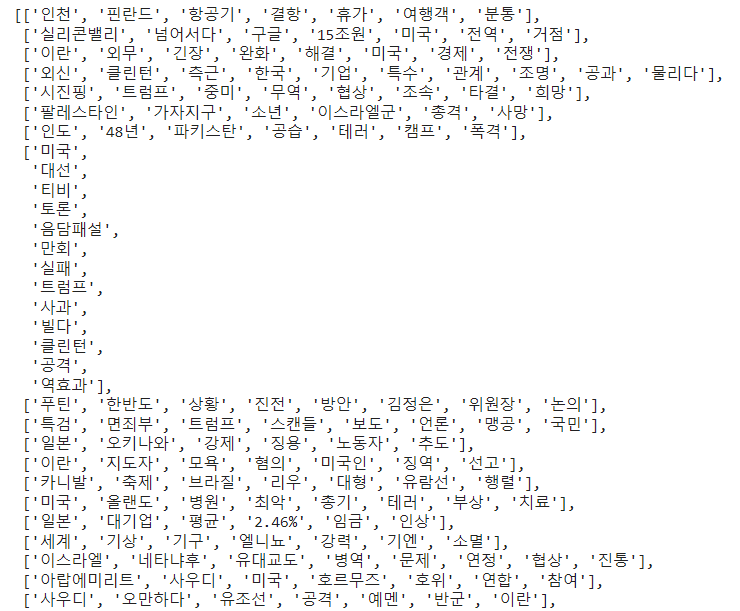

In [ ]:
y_train

array([4, 4, 4, ..., 1, 2, 2])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
print(tokenizer.word_index)

image.png

In [ ]:
len( tokenizer.word_index )

27092

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value

In [ ]:
print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')

전체 단어 집합: 27092
2번 이하로 사용된 단어의 집합: 14868
2번 이하로 사용된 단어의 집합의 비율: 54.879669275062746
2번 이하로 사용된 단어의 출현 비율: 6.3547061255078825


In [ ]:
max_words = total_cnt - rare_cnt + 1
max_words

12225

In [ ]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train)
x_train1 = tokenizer.texts_to_sequences(x_train)


In [ ]:
print(f'최대 길이: { max(len(words) for words in x_train) }')
print(f'평균 길이: { sum(len(words) for words in x_train)/len(x_train) }')

최대 길이: 21
평균 길이: 6.533296739488418


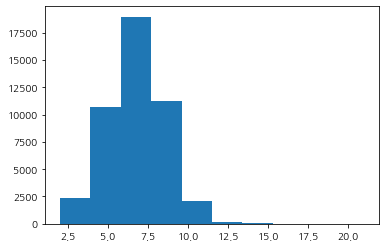

In [ ]:
plt.hist( [len(words) for words in x_train ])
plt.show()

In [ ]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [ ]:
import wordcloud
from wordcloud import WordCloud

In [ ]:
train_count = []
for i in range(len(train_token)):
    train_count.append(train_token[i][0])
train_count = sum(train_count, [])

In [ ]:
count = Counter(train_count)
words = dict(count.most_common())
words

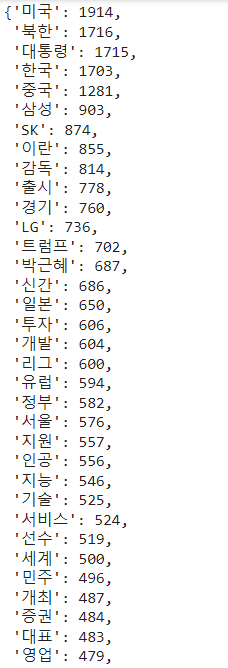

In [ ]:
wordcloud = WordCloud(font_path = '/home/lab12/data/BMDOHYEON_ttf.ttf',
                      background_color='white', colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words)

Text(0.5, 1.0, '전체')

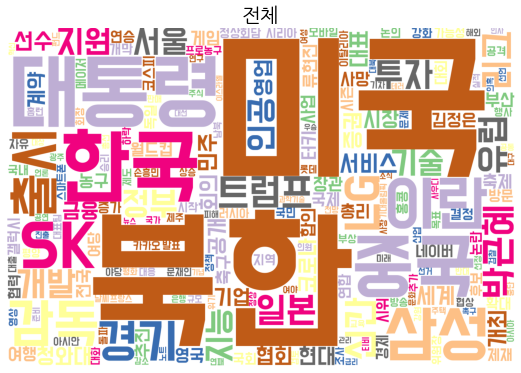

In [ ]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('전체', size=20)


## IT 과학

In [ ]:
x_train0 = [ line[0] for line in train_0 if len(line[0]) > 1]
y_train0 = np.array([ int(line[1]) for line in train_0 if len(line[0]) > 1])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train0)
print(tokenizer.word_index)

In [ ]:

len( tokenizer.word_index )

12871

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

In [ ]:
rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value

In [ ]:
print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')

전체 단어 집합: 12871
2번 이하로 사용된 단어의 집합: 10587
2번 이하로 사용된 단어의 집합의 비율: 82.25468106596225
2번 이하로 사용된 단어의 출현 비율: 35.21705404085385


In [ ]:
max_words = total_cnt - rare_cnt + 1
max_words

2285

In [ ]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train0)
x_train0 = tokenizer.texts_to_sequences(x_train0)


In [ ]:
print(f'최대 길이: { max(len(words) for words in x_train0) }')
print(f'평균 길이: { sum(len(words) for words in x_train0)/len(x_train0) }')

최대 길이: 12
평균 길이: 4.674336650082918


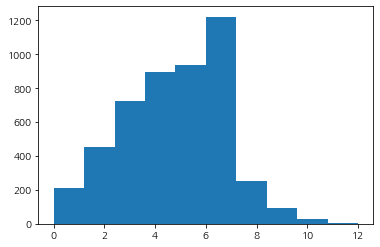

In [ ]:
plt.hist( [len(words) for words in x_train0 ])
plt.show()

In [ ]:
train0_count = []
for i in range(len(train0_token)):
    train0_count.append(train0_token[i][0])
train0_count = sum(train0_count, [])

In [ ]:
train0_count

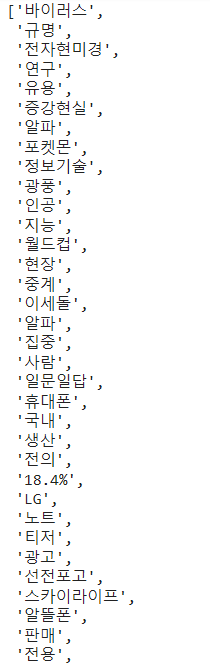

In [ ]:
count = Counter(train0_count)
words0 = dict(count.most_common())
words0

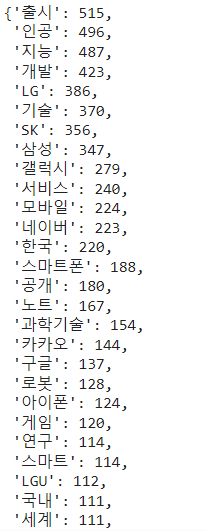

In [ ]:
wordcloud0 = WordCloud(font_path = '/home/lab12/data/BMDOHYEON_ttf.ttf',
                      background_color='white', colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words0)

## 경제

In [ ]:
x_train1 = [ line[0] for line in train_1 if len(line[0]) > 1]
y_train1 = np.array([ int(line[1]) for line in train_1 if len(line[0]) > 1])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train1)
print(tokenizer.word_index)

In [ ]:
x_train1

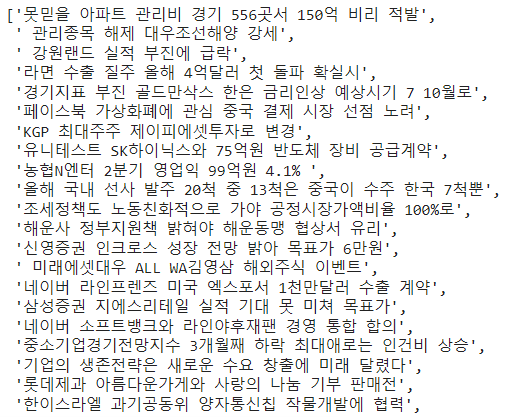

In [ ]:
len( tokenizer.word_index )


15023

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

In [ ]:
rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value


print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')

전체 단어 집합: 15023
2번 이하로 사용된 단어의 집합: 12345
2번 이하로 사용된 단어의 집합의 비율: 82.1739998668708
2번 이하로 사용된 단어의 출현 비율: 33.612457072964204


In [ ]:
max_words = total_cnt - rare_cnt + 1
max_words

2679

In [ ]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train1)
x_train1 = tokenizer.texts_to_sequences(x_train1)

In [ ]:
print(f'최대 길이: { max(len(words) for words in x_train1) }')
print(f'평균 길이: { sum(len(words) for words in x_train1)/len(x_train1) }')

최대 길이: 16
평균 길이: 4.536162005785921


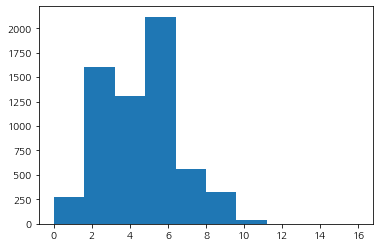

In [ ]:
plt.hist( [len(words) for words in x_train1 ])
plt.show()

In [ ]:
train1_count = []
for i in range(len(train1_token)):
    train1_count.append(train1_token[i][0])
train1_count = sum(train1_count, [])


In [ ]:
count = Counter(train1_count)
words1 = dict(count.most_common())
words1

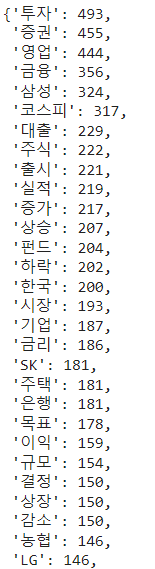

In [ ]:
wordcloud1 = WordCloud(font_path = '/home/lab12/data/BMDOHYEON_ttf.ttf',
                      background_color='white', colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words1)

## 사회

In [ ]:
x_train2 = [ line[0] for line in train_2 if len(line[0]) > 1]
y_train2 = np.array([ int(line[1]) for line in train_2 if len(line[0]) > 1])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train2)
print(tokenizer.word_index)


In [ ]:
len( tokenizer.word_index )

21556

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value

In [ ]:
print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')

전체 단어 집합: 21556
2번 이하로 사용된 단어의 집합: 18103
2번 이하로 사용된 단어의 집합의 비율: 83.9812581183893
2번 이하로 사용된 단어의 출현 비율: 41.86831060864676


In [ ]:
max_words = total_cnt - rare_cnt + 1
max_words

3454

In [ ]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train2)
x_train2 = tokenizer.texts_to_sequences(x_train2)


print(f'최대 길이: { max(len(words) for words in x_train2) }')
print(f'평균 길이: { sum(len(words) for words in x_train2)/len(x_train2) }')

최대 길이: 11
평균 길이: 3.932219505569139


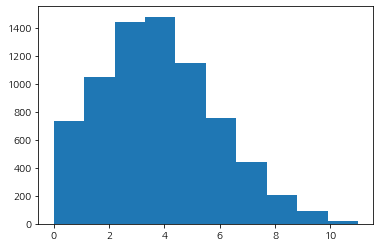

In [ ]:
plt.hist( [len(words) for words in x_train2 ])
plt.show()

In [ ]:
train2_count = []
for i in range(len(train2_token)):
    train2_count.append(train2_token[i][0])
train2_count = sum(train2_count, [])

count = Counter(train2_count)
words2 = dict(count.most_common())
words2

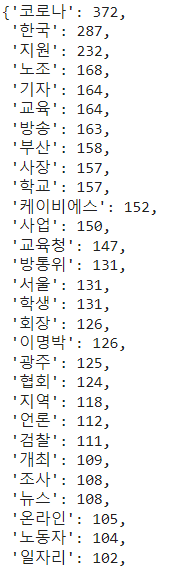

In [ ]:
wordcloud2 = WordCloud(font_path = '/home/lab12/data/BMDOHYEON_ttf.ttf',
                      background_color='white', colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words2)

## 생활문화

In [ ]:
x_train3 = [ line[0] for line in train_3 if len(line[0]) > 1]
y_train3 = np.array([ int(line[1]) for line in train_3 if len(line[0]) > 1])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train3)
print(tokenizer.word_index)

In [ ]:
len( tokenizer.word_index )

16986

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value


print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')


전체 단어 집합: 16986
2번 이하로 사용된 단어의 집합: 14371
2번 이하로 사용된 단어의 집합의 비율: 84.60496879783351
2번 이하로 사용된 단어의 출현 비율: 42.13381092490726


In [ ]:
max_words = total_cnt - rare_cnt + 1
max_words

2616

In [ ]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train3)
x_train3 = tokenizer.texts_to_sequences(x_train3)


print(f'최대 길이: { max(len(words) for words in x_train3) }')
print(f'평균 길이: { sum(len(words) for words in x_train3)/len(x_train3) }')


최대 길이: 11
평균 길이: 3.81206809371313


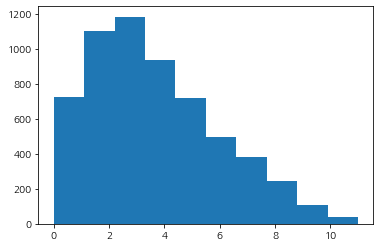

In [ ]:
plt.hist( [len(words) for words in x_train3 ])
plt.show()

In [ ]:
train3_count = []
for i in range(len(train3_token)):
    train3_count.append(train3_token[i][0])
train3_count = sum(train3_count, [])

count = Counter(train3_count)
words3 = dict(count.most_common())
words3

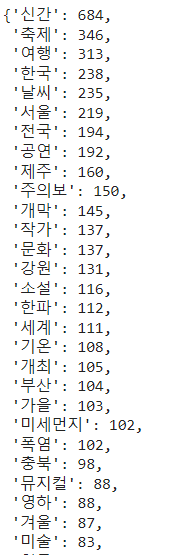

In [ ]:
wordcloud3 = WordCloud(font_path = '/home/lab12/data/BMDOHYEON_ttf.ttf',
                      background_color='white', colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words3)

## 세계

In [ ]:
x_train4 = [ line[0] for line in train_4 if len(line[0]) > 1]
y_train4 = np.array([ int(line[1]) for line in train_4 if len(line[0]) > 1])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train4)
print(tokenizer.word_index)


In [ ]:
len( tokenizer.word_index )

20908

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value


print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')


전체 단어 집합: 20908
2번 이하로 사용된 단어의 집합: 16970
2번 이하로 사용된 단어의 집합의 비율: 81.16510426630956
2번 이하로 사용된 단어의 출현 비율: 32.447536308336495


In [ ]:
max_words = total_cnt - rare_cnt + 1
max_words

tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train4)
x_train4 = tokenizer.texts_to_sequences(x_train4)

In [ ]:
print(f'최대 길이: { max(len(words) for words in x_train4) }')
print(f'평균 길이: { sum(len(words) for words in x_train4)/len(x_train4) }')

최대 길이: 18
평균 길이: 5.371346179053611


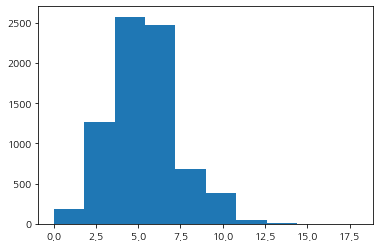

In [ ]:
plt.hist( [len(words) for words in x_train4])
plt.show()

In [ ]:
train4_count = []
for i in range(len(train4_token)):
    train4_count.append(train4_token[i][0])
train4_count = sum(train4_count, [])

count = Counter(train4_count)
words4 = dict(count.most_common())
words4

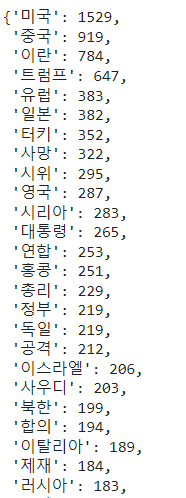

In [ ]:
wordcloud4 = WordCloud(font_path = '/home/lab12/data/BMDOHYEON_ttf.ttf',
                      background_color='white', colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words4)

## 스포츠

In [ ]:
x_train5 = [ line[0] for line in train_5 if len(line[0]) > 1]
y_train5 = np.array([ int(line[1]) for line in train_5 if len(line[0]) > 1])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train5)
print(tokenizer.word_index)


In [ ]:
len( tokenizer.word_index )

15157

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value

In [ ]:
print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')


전체 단어 집합: 15157
2번 이하로 사용된 단어의 집합: 11752
2번 이하로 사용된 단어의 집합의 비율: 77.53513228211388
2번 이하로 사용된 단어의 출현 비율: 26.2664023411687


In [ ]:
max_words = total_cnt - rare_cnt + 1
max_words

3406

In [ ]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train5)
x_train5 = tokenizer.texts_to_sequences(x_train5)


print(f'최대 길이: { max(len(words) for words in x_train5) }')
print(f'평균 길이: { sum(len(words) for words in x_train5)/len(x_train5) }')



최대 길이: 11
평균 길이: 5.6329150439925


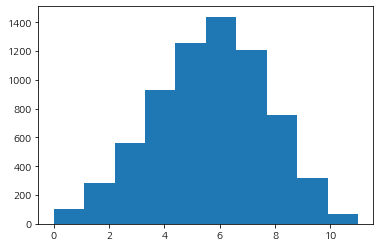

In [ ]:
plt.hist( [len(words) for words in x_train5 ])
plt.show()


In [ ]:
train5_count = []
for i in range(len(train5_token)):
    train5_count.append(train5_token[i][0])
train5_count = sum(train5_count, [])

count = Counter(train5_count)
words5 = dict(count.most_common())
words5


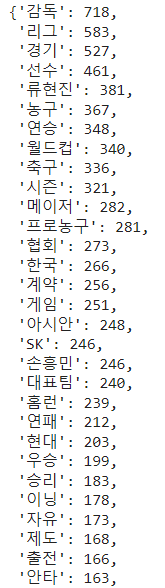

In [ ]:
wordcloud5 = WordCloud(font_path = '/home/lab12/data/BMDOHYEON_ttf.ttf',
                      background_color='white', colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words5)

## 정치

In [ ]:
x_train6 = [ line[0] for line in train_6 if len(line[0]) > 1]
y_train6 = np.array([ int(line[1]) for line in train_6 if len(line[0]) > 1])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train6)
print(tokenizer.word_index)

In [ ]:
len( tokenizer.word_index )

17705

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0


In [ ]:
rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value


print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')

전체 단어 집합: 17705
2번 이하로 사용된 단어의 집합: 14507
2번 이하로 사용된 단어의 집합의 비율: 81.93730584580628
2번 이하로 사용된 단어의 출현 비율: 35.065231843111185


In [ ]:
max_words = total_cnt - rare_cnt + 1
max_words

3199

In [ ]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train6)
x_train6 = tokenizer.texts_to_sequences(x_train6)


In [ ]:
print(f'최대 길이: { max(len(words) for words in x_train6) }')
print(f'평균 길이: { sum(len(words) for words in x_train6)/len(x_train6) }')

최대 길이: 15
평균 길이: 4.629980743593542


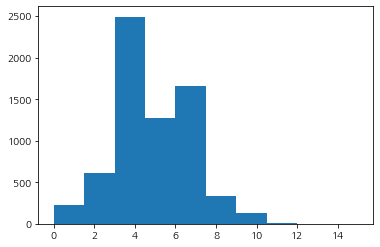

In [ ]:
plt.hist( [len(words) for words in x_train6 ])
plt.show()

In [ ]:
train6_count = []
for i in range(len(train6_token)):
    train6_count.append(train6_token[i][0])
train6_count = sum(train6_count, [])

count = Counter(train6_count)
words6 = dict(count.most_common())
words6

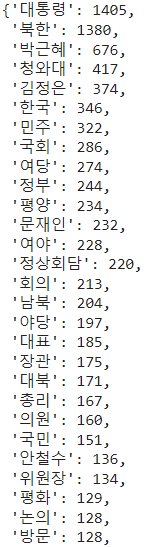

In [ ]:
wordcloud6 = WordCloud(font_path = '/home/lab12/data/BMDOHYEON_ttf.ttf',
                      background_color='white', colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words6)

## 비슷한 환경에서 쓰인 단어

In [ ]:
from nltk import Text

text0 = Text(train0_count)
text1 = Text(train1_count)
text2 = Text(train2_count)
text3 = Text(train3_count)
text4 = Text(train4_count)
text5 = Text(train5_count)
text6 = Text(train6_count)

In [ ]:
text0.similar('출시')


개시 노트 공개 시작 갤럭시 국내 삼성 업계 원금 탑재 색상 돋보기 예약판매 월드컵 휴대폰 전의 알뜰폰 판매 행사 방송


In [ ]:
text1.similar('출시')

거래 농협 국내 판매 개발 업계 개인 하루 가입 도입 정보 공개 개시 누적 돋보기 재개 출격 선착순 일주일 미리


In [ ]:
text2.similar('코로나')

경남 특별 청년 온라인 대전 희망 고교생 경북 사회 감독 포함 가족 사립 무더기 충남 여명 급증 청문회 제조업 지인


In [ ]:
text3.similar('신간')

개최 인기 뮤지컬 전국 추워지다 개막 여행 변신 열기 장마전선 동북아 기록 송도 경연 목포 통해 코믹콘 kf 소프라노


In [ ]:
text4.similar('미국')

트럼프 대통령 중국 외무 지도자 반대 러시아 제재 시리아 매체 이란 영국 정부 시위 북미 바레인 외신 시진핑 언론 전문가


In [ ]:
text5.similar('감독')

mvp 경기 에이스 연패 한국 대표팀 대승 사령탑 이재영 시즌 임도 태극전사 이적 kia 완파 류현진 계약 선수 도전 입국


In [ ]:
text6.similar('대통령')

정부 청와대 논의 트럼프 대표 안철수 평양 회의 총리 후보 남북 김정은 회담 재개 북한 한국 원내대표 주장 차관 국회


# 데이터 시각화

## 워드 클라우드

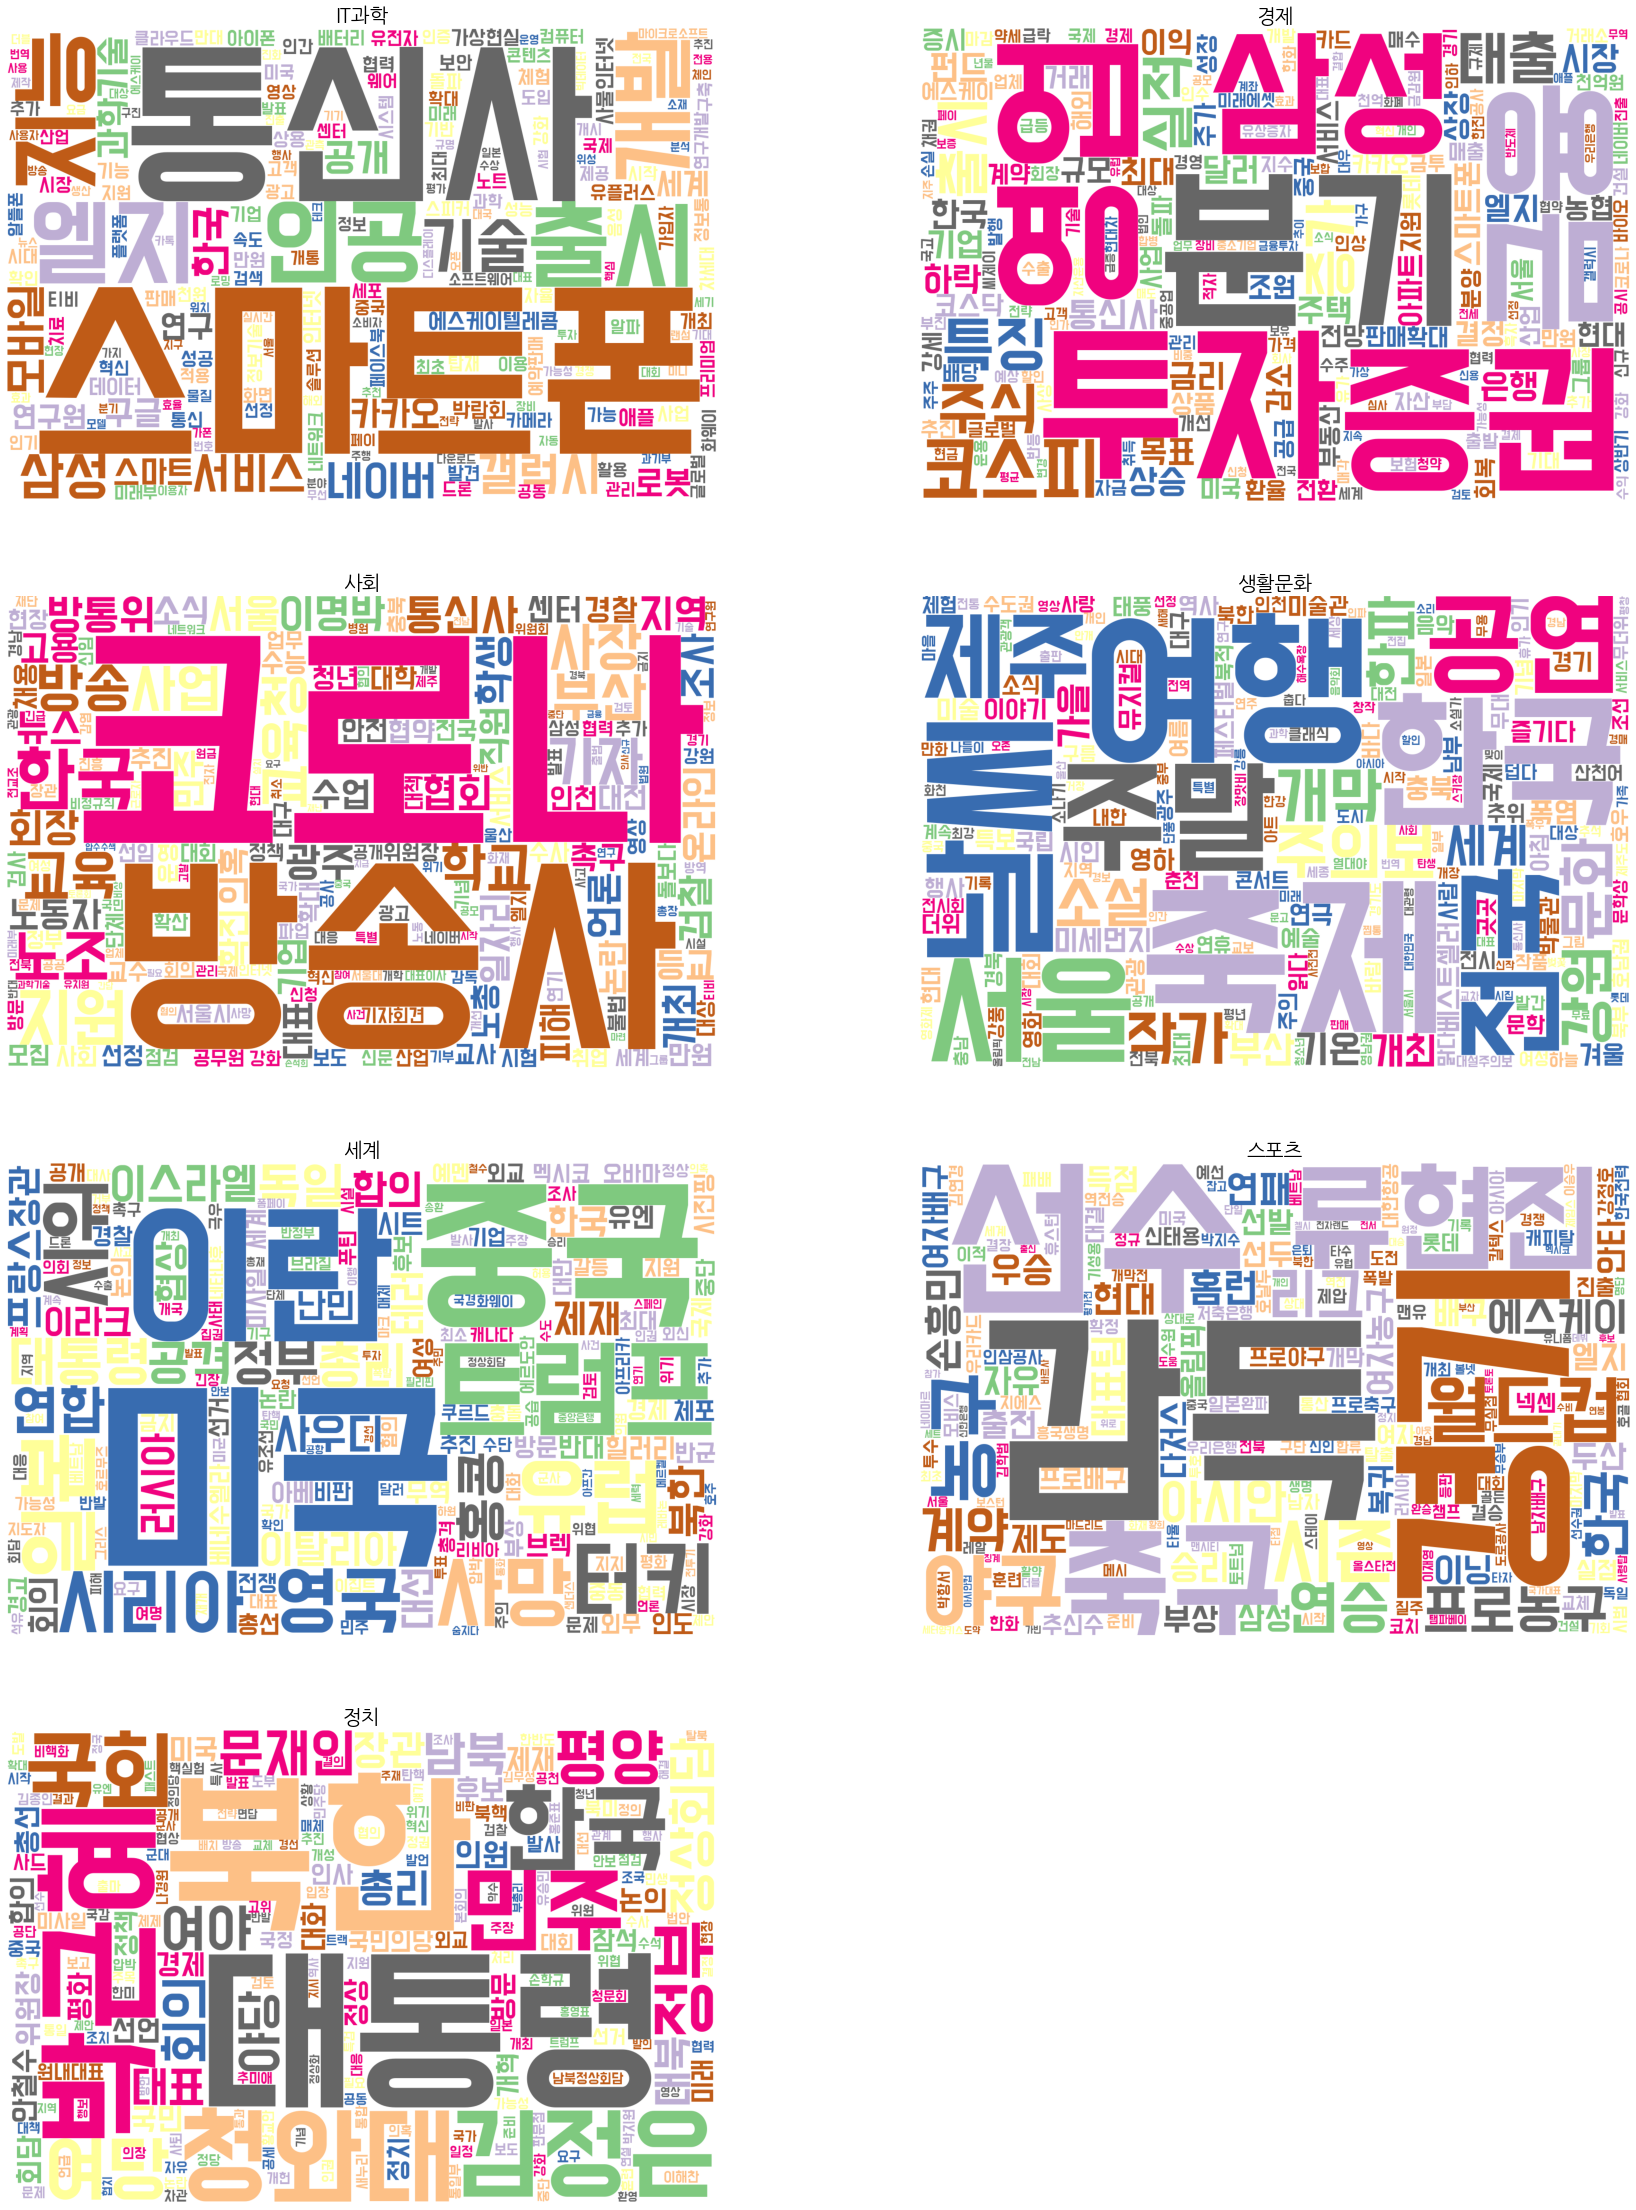

In [ ]:
plt.figure(figsize=(30, 40))

plt.subplot(4, 2, 1)
plt.imshow(wordcloud0)
plt.axis('off')
plt.title('IT과학', size=20)

plt.subplot(4, 2, 2)
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('경제', size=20)

plt.subplot(4, 2, 3)
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('사회', size=20)

plt.subplot(4, 2, 4)
plt.imshow(wordcloud3)
plt.axis('off')
plt.title('생활문화', size=20)

plt.subplot(4, 2, 5)
plt.imshow(wordcloud4)
plt.axis('off')
plt.title('세계', size=20)

plt.subplot(4, 2, 6)
plt.imshow(wordcloud5)
plt.axis('off')
plt.title('스포츠', size=20)

plt.subplot(4, 2, 7)
plt.imshow(wordcloud6)
plt.axis('off')
plt.title('정치', size=20)

plt.show()

In [ ]:
from collections import Counter, defaultdict
test = defaultdict(int)
for word in train0_count:
    print(word)
    test[word] += 1

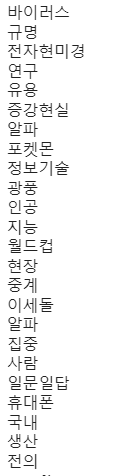

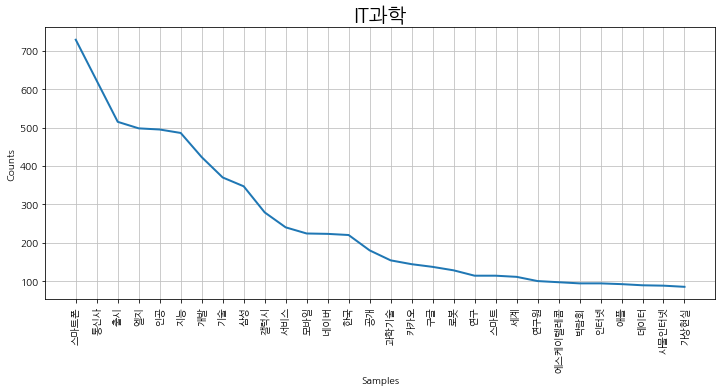

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('IT과학', size=20)
text0.plot(30)
plt.show()

## 네트워크 그래프

- IT과학, 사회, 경제, 세계, 정치 주제에 대해 네트워크 그래프


In [ ]:
dataset = []
for i in range(len(train0_token)):
    dataset.append(train0_token[i][0])

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=947385017a81c27737cbe3350b638a5cafb2872dd29ea6da2a6da77523a478d8
  Stored in directory: /home/lab12/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
from apyori import apriori

- 항목 개수가 2개, 지지도가 0.01 이상인 항목집합
- 지지도 : A와 B의 교집합

In [ ]:
result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)
df.head(10)

,items,support,ordered_statistics,length
92,"(인공, 지능)",0.091418,"[((), (인공, 지능), 0.0914179104477612, 1.0), ((인공...",2
83,"(갤럭시, 삼성)",0.023425,"[((), (갤럭시, 삼성), 0.023424543946932008, 1.0), (...",2
80,"(텔레콤, SK)",0.020315,"[((), (텔레콤, SK), 0.0203150912106136, 1.0), ((S...",2
81,"(개발, 기술)",0.019279,"[((), (개발, 기술), 0.01927860696517413, 1.0), ((개...",2
89,"(모바일, 박람회)",0.018864,"[((), (모바일, 박람회), 0.018864013266998342, 1.0), ...",2
78,"(출시, LG)",0.018449,"[((), (출시, LG), 0.018449419568822553, 1.0), ((...",2
91,"(한국, 연구원)",0.016584,"[((), (한국, 연구원), 0.01658374792703151, 1.0), ((...",2
86,"(한국, 과학기술)",0.015962,"[((), (한국, 과학기술), 0.015961857379767828, 1.0), ...",2
77,"(LG, 유플러스)",0.015755,"[((), (LG, 유플러스), 0.015754560530679935, 1.0), ...",2
85,"(연구원, 과학기술)",0.015547,"[((), (연구원, 과학기술), 0.01554726368159204, 1.0), ...",2


In [ ]:
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.0 MB/s eta 0:00:00


In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [ ]:
# 페이지 랭크 -> 노드 순위를 제공하므로 색깔에 영향을 줌
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [ ]:
pos = nx.circular_layout(G)

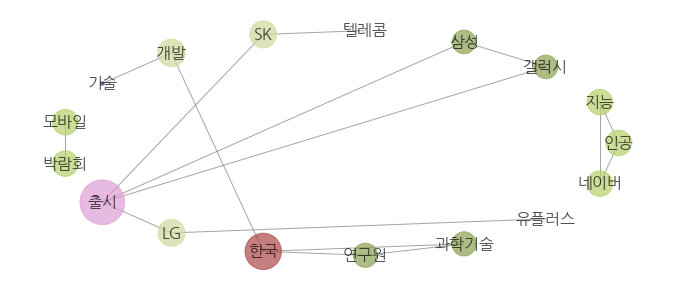

In [ ]:
plt.figure(figsize=(12, 5))
plt.axis('off')
nx.draw_networkx(G, font_family='NanumGothic', font_size=16,
                pos=pos, node_color=list(pr.values()), node_size=nsize,
                alpha=0.7, edge_color='.5', cmap='tab20b')

In [ ]:
dataset = []
for i in range(len(train1_token)):
    dataset.append(train1_token[i][0])

In [ ]:
result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)
df.head(10)

,items,support,ordered_statistics,length
96,"(이익, 영업)",0.021697,"[((), (이익, 영업), 0.021697203471552556, 1.0), ((...",2
97,"(증가, 영업)",0.016393,"[((), (증가, 영업), 0.01639344262295082, 1.0), ((영...",2
98,"(투자, 증권)",0.016072,"[((), (투자, 증권), 0.016072002571520413, 1.0), ((...",2
88,"(영업, 감소)",0.013983,"[((), (감소, 영업), 0.013982642237222759, 1.0), ((...",2
89,"(투자, 농협)",0.012858,"[((), (투자, 농협), 0.01285760205721633, 1.0), ((농...",2
90,"(환율, 달러)",0.012858,"[((), (환율, 달러), 0.01285760205721633, 1.0), ((달...",2
93,"(상승, 코스피)",0.012697,"[((), (상승, 코스피), 0.012696882031501124, 1.0), (...",2
91,"(목표, 실적)",0.011733,"[((), (목표, 실적), 0.011732561877209901, 1.0), ((...",2
92,"(목표, 증권)",0.011250,"[((), (목표, 증권), 0.011250401800064288, 1.0), ((...",2
95,"(실적, 증권)",0.011090,"[((), (실적, 증권), 0.011089681774349084, 1.0), ((...",2


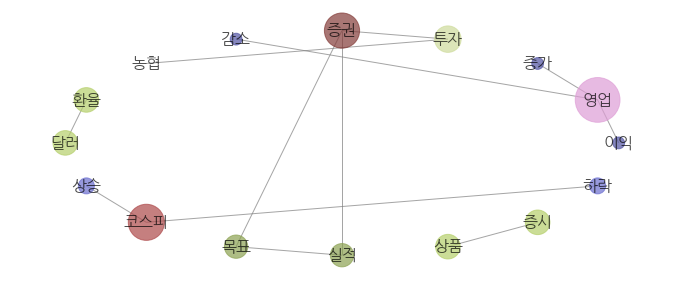

In [ ]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)


pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))


pos = nx.circular_layout(G)

plt.figure(figsize=(12, 5))
plt.axis('off')
nx.draw_networkx(G, font_family='NanumGothic', font_size=16,
                pos=pos, node_color=list(pr.values()), node_size=nsize,
                alpha=0.7, edge_color='.5', cmap='tab20b')

In [ ]:
dataset = []
for i in range(len(train4_token)):
    dataset.append(train4_token[i][0])

In [ ]:
result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)
df.head(10)


,items,support,ordered_statistics,length
78,"(미국, 이란)",0.035653,"[((), (미국, 이란), 0.03565342771005374, 1.0), ((미...",2
87,"(연합, 유럽)",0.027789,"[((), (연합, 유럽), 0.027788701009306593, 1.0), ((...",2
80,"(미국, 중국)",0.022808,"[((), (미국, 중국), 0.022807707432166733, 1.0), ((...",2
81,"(미국, 트럼프)",0.017433,"[((), (미국, 트럼프), 0.017433477519989513, 1.0), (...",2
82,"(브렉, 시트)",0.016123,"[((), (브렉, 시트), 0.016122689736531654, 1.0), ((...",2
79,"(미국, 제재)",0.014812,"[((), (미국, 제재), 0.014811901953073798, 1.0), ((...",2
85,"(홍콩, 시위)",0.014419,"[((), (홍콩, 시위), 0.01441866561803644, 1.0), ((시...",2
84,"(시리아, 터키)",0.011666,"[((), (시리아, 터키), 0.011666011272774938, 1.0), (...",2
89,"(합의, 이란)",0.011535,"[((), (합의, 이란), 0.011534932494429152, 1.0), ((...",2
88,"(제재, 이란)",0.011273,"[((), (제재, 이란), 0.01127277493773758, 1.0), ((이...",2


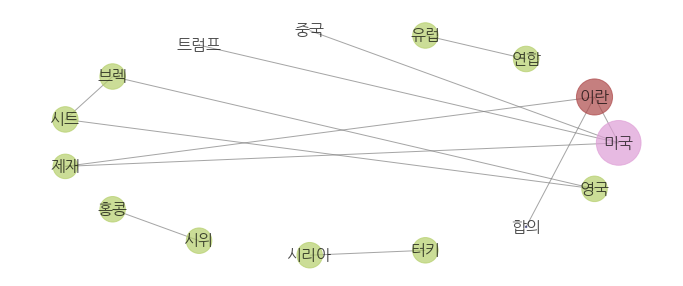

In [ ]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)


pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))


pos = nx.circular_layout(G)

plt.figure(figsize=(12, 5))
plt.axis('off')
nx.draw_networkx(G, font_family='NanumGothic', font_size=16,
                pos=pos, node_color=list(pr.values()), node_size=nsize,
                alpha=0.7, edge_color='.5', cmap='tab20b')

In [ ]:
dataset = []
for i in range(len(train6_token)):
    dataset.append(train6_token[i][0])
dataset

In [ ]:
result = (list(apriori(dataset, min_support=0.01)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length']==2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)
df.head(10)

,items,support,ordered_statistics,length
85,"(박근혜, 대통령)",0.093764,"[((), (박근혜, 대통령), 0.0937638868315805, 1.0), ((...",2
82,"(김정은, 북한)",0.031699,"[((), (김정은, 북한), 0.03169900755443638, 1.0), ((...",2
96,"(평양, 정상회담)",0.016738,"[((), (평양, 정상회담), 0.016738260998370613, 1.0), ...",2
84,"(문재인, 대통령)",0.016294,"[((), (문재인, 대통령), 0.0162938823877944, 1.0), ((...",2
86,"(대통령, 북한)",0.016294,"[((), (대통령, 북한), 0.0162938823877944, 1.0), ((대...",2
87,"(대통령, 정상회담)",0.013183,"[((), (대통령, 정상회담), 0.013183232113760924, 1.0),...",2
93,"(박근혜, 북한)",0.012591,"[((), (박근혜, 북한), 0.012590727299659309, 1.0), (...",2
92,"(미사일, 북한)",0.012146,"[((), (미사일, 북한), 0.012146348689083099, 1.0), (...",2
94,"(발사, 북한)",0.011850,"[((), (발사, 북한), 0.01185009628203229, 1.0), ((발...",2
90,"(북한, 도발)",0.011702,"[((), (도발, 북한), 0.011701970078506888, 1.0), ((...",2


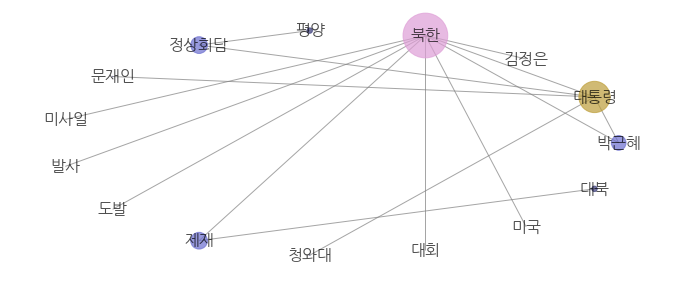

In [ ]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)


pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))


pos = nx.circular_layout(G)

plt.figure(figsize=(12, 5))
plt.axis('off')
nx.draw_networkx(G, font_family='NanumGothic', font_size=16,
                pos=pos, node_color=list(pr.values()), node_size=nsize,
                alpha=0.7, edge_color='.5', cmap='tab20b')

# 모델링

In [ ]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
train, validation = train_test_split(data, train_size=0.7, random_state=123)

In [ ]:
print(len(train))
print(len(validation))

In [ ]:
x_train = [ line[0] for line in train if len(line[0]) > 1]
y_train = np.array([ int(line[1]) for line in train if len(line[0]) > 1])

x_validation = [ line[0] for line in validation if len(line[0]) > 1]
y_validation = np.array([ int(line[1]) for line in validation if len(line[0]) > 1])

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
print(tokenizer.word_index)

In [ ]:
len(tokenizer.word_index)

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value

In [ ]:
print(f'전체 단어 집합: {total_cnt}')

print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')

print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')

print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')


- 전체 단어 집합: 23379
- 2번 이하로 사용된 단어의 집합: 13446
- 2번 이하로 사용된 단어의 집합의 비율: 57.513152829462335
- 2번 이하로 사용된 단어의 출현 비율: 8.179138300221812

In [ ]:
max_words = total_cnt - rare_cnt + 1
max_words

9934

In [ ]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_validation = tokenizer.texts_to_sequences(x_validation)

In [ ]:
print(f'최대 길이: {max(len(news) for news in x_train)}')
print(f'평균 길이: {sum(len(news) for news in x_train)/len(x_train)}')

- 최대 길이: 21
- 평균 길이: 5.998870800790439

## 자료의 크기 확인

In [ ]:
plt.hist([len(news) for news in x_train])
plt.title('단어 수')
plt.show()

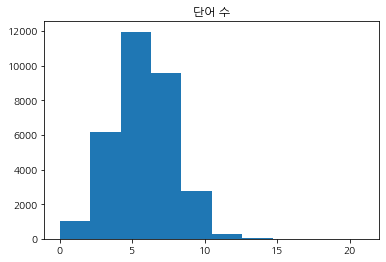

In [ ]:
# 최대 길이에 맞춰서 패딩을 삽입
maxLen = 21
x_train = tf.keras.preprocessing.sequence.pad_sequences( x_train, maxlen = maxLen )
y_train = np.asarray( y_train )

x_validation = tf.keras.preprocessing.sequence.pad_sequences( x_validation, maxlen = maxLen )
y_validation = np.asarray( y_validation )

## flatten + Dense

In [ ]:
# 종속변수 데이터 전처리
y_train = to_categorical(y_train) # Y_train 에 원-핫 인코딩
print(y_train)
print(y_train.shape)

In [ ]:
embedding_dim = 100
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Embedding( max_words, embedding_dim, input_length=maxLen) )
model.add( tf.keras.layers.Flatten() )
model.add( tf.keras.layers.Dense( 7, activation='sigmoid'))

In [ ]:
model.compile(
    loss='binary_crossentropy',
    metrics=['acc'],
    optimizer='rmsprop'
)

In [ ]:
hist = model.fit( x_train, y_train, epochs=10, batch_size=256, validation_split = 0.2 )

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()

plt.show()

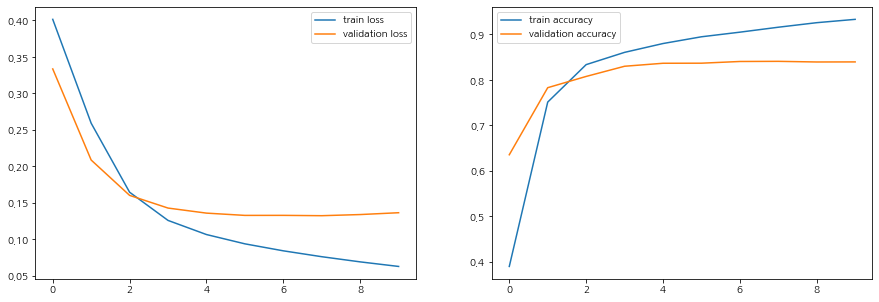

## Simple RNN

In [ ]:
# 종속변수 데이터 전처리
y_train = to_categorical(y_train) # Y_train 에 원-핫 인코딩
print(y_train)
print(y_train.shape)

In [ ]:
embedding_dim = 100
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxLen))
model.add(tf.keras.layers.SimpleRNN(units = 64, return_sequences = True))
model.add(tf.keras.layers.SimpleRNN(units = 64, return_sequences = True))
model.add(tf.keras.layers.SimpleRNN(units = 64))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['acc'],
    optimizer='adam'
)

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split = 0.2)

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()

plt.show()

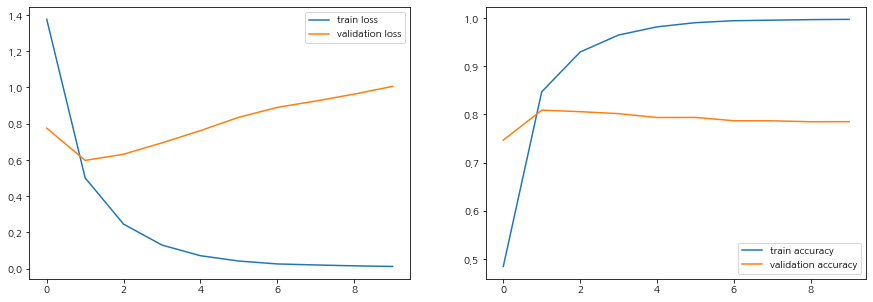

## 단방향 LSTM

In [ ]:
# 종속변수 데이터 전처리
y_train = to_categorical(y_train) # Y_train 에 원-핫 인코딩
print(y_train)
print(y_train.shape)

In [ ]:
embedding_dim = 100
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxLen))
model.add(tf.keras.layers.LSTM(units = 64, return_sequences = True))
model.add(tf.keras.layers.LSTM(units = 64, return_sequences = True))
model.add(tf.keras.layers.LSTM(units = 64))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['acc'],
    optimizer='sgd'
)

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split = 0.2)

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()

plt.show()

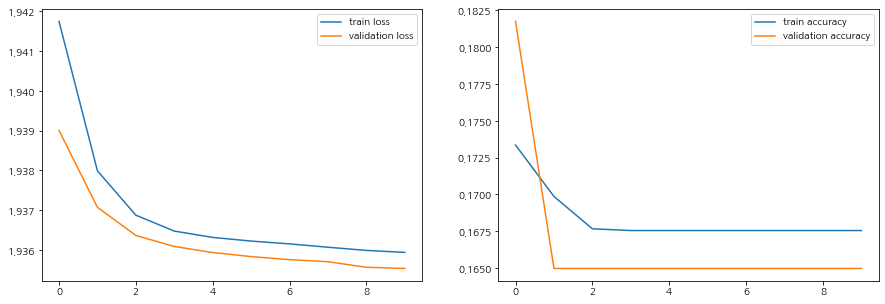

## 양방향 LSTM

In [ ]:
embedding_dim = 100
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxLen))
model.add(tf.keras.layers.Bidirectional(LSTM(64, return_sequences = True)))
model.add(tf.keras.layers.Bidirectional(LSTM(64, return_sequences = True)))
model.add(tf.keras.layers.Bidirectional(LSTM(64)))
model.add(tf.keras.layers.Dense(7, activation='softmax'))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['acc'],
    optimizer='adam'
)

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split = 0.2)

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()

plt.show()

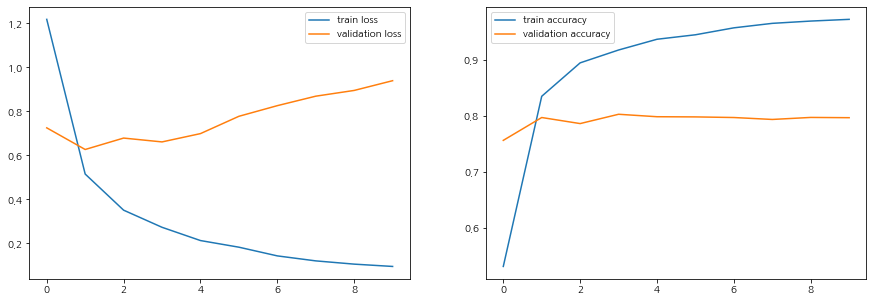

## Conv넷

In [ ]:
# 종속변수 데이터 전처리
y_train = to_categorical(y_train) # Y_train 에 원-핫 인코딩
print(y_train)
print(y_train.shape)

In [ ]:
embedding_dim = 100
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxLen))
model.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool1D(5))
model.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.compile(
  loss='categorical_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

In [ ]:
hist = model.fit( x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()

plt.show()

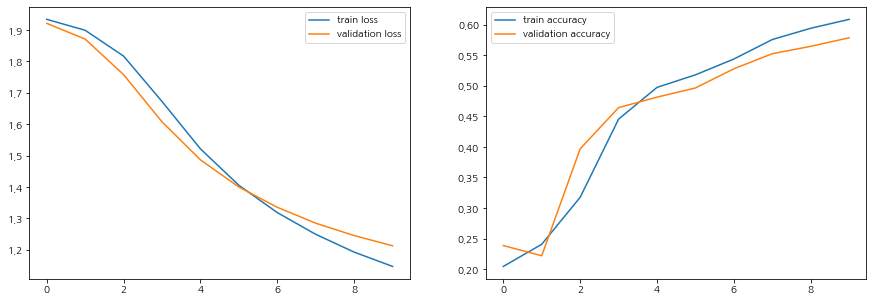

여기서부터는 파라미터 수정

In [ ]:
embedding_dim = 100
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxLen))
model.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.compile(
  loss='categorical_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

In [ ]:
hist = model.fit( x_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 50/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1877 - acc: 0.9412 - val_loss: 0.5369 - val_acc: 0.8408

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()

plt.show()

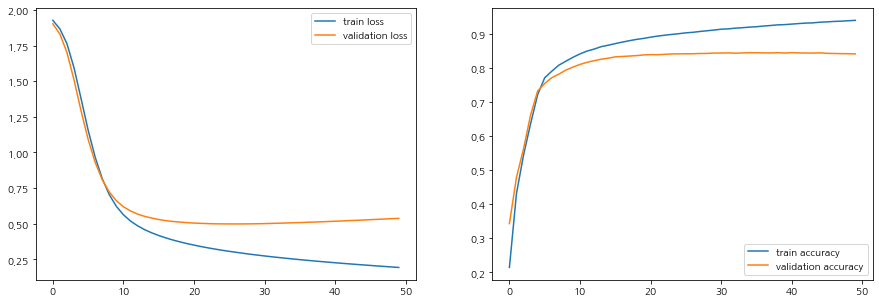

# 한자, 영어 처리 안했을 때의 결과

## 데이터 전처리

In [ ]:
def word_delete(title):
    delete_word = [
        "1보",
        "2보",
        "3보",
        "4보",
        "5보",
        "속보",
        "사진",
        "게시판",
        "주말 N",
        "QA",
        "그래픽",
        "국내",
        "동정",
        "속보",
        "신간",
        "위클리",
        "주간 화제의 뉴스",
        "카드뉴스",
        "팩트체크",
    ]
    for i in delete_word:
        if title.endswith(i) or title.startswith(i):
            title = title.replace(i, "")
    if title.endswith("종합"):
        title = title[:-2]
    title = title.replace("↑", " 증가")
    title = title.replace("↓", " 감소")
    title = title.replace("→", "에서 ")
    title = title.replace("~", "에서 ")
    title = title.replace("...", ". ")
    title = title.replace("·", " 그리고 ")
    title = title.replace(":", " 대 ")
    title = title.upper()
    return title

def clean_Text( text ):
    ret = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z一-龥0-9\\s.%]", " ", text)
    return ret

def word_eda(text):
    text = clean_Text(text)
    text = word_delete(text)    
    return text

In [ ]:
train_clean = []
for i in range(0, len(train)):
    train_clean.append([cleanText(train.iloc[i, :][1]), int(train.iloc[i, :][2])])

## 데이터 시각화

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value

In [ ]:
print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')

- 전체 단어 집합: 9356
- 2번 이하로 사용된 단어의 집합: 5937
- 2번 이하로 사용된 단어의 집합의 비율: 63.45660538691749
- 2번 이하로 사용된 단어의 출현 비율: 13.815642040785836

In [ ]:
max_words = total_cnt - rare_cnt + 1
max_words

3420

In [ ]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train4)
x_train4 = tokenizer.texts_to_sequences(x_train4)

In [ ]:
print(f'최대 길이: { max(len(words) for words in x_train4) }')
print(f'평균 길이: { sum(len(words) for words in x_train4)/len(x_train4) }')

- 최대 길이: 13
- 평균 길이: 6.050871902451816

In [ ]:
plt.hist( [len(words) for words in x_train4 ] ,bins=15)
plt.show()

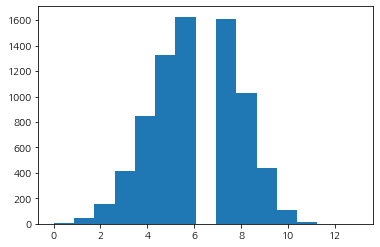

In [ ]:
wordcloud = WordCloud(font_path = '/home/lab10/data/KoPubWorld Dotum Medium.ttf',
                      background_color='white', colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words4)

In [ ]:
plt.figure(figsize=(30, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('세계', size=20)

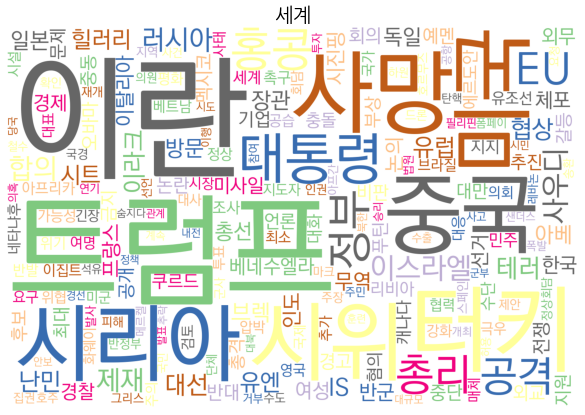

4번 토픽만 확인해봤는데 큰 차이가 있지는 않은듯한 모습

In [ ]:
from nltk import Text

text4 = Text(train4_count)

In [ ]:
plt.figure(figsize=(15, 5))
text4.plot(50)
plt.show()

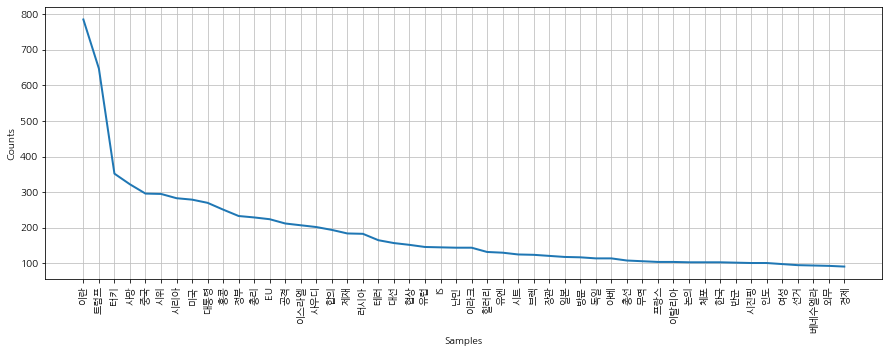

이후 동일한 모델링 과정을 거쳤습니다.

In [ ]:
#train & test 데이터로 나누기
from sklearn.model_selection import train_test_split
                                                         
train, validation = train_test_split(data, train_size=0.7, random_state=123)

In [ ]:
x_train = [ line[0] for line in train if len(line[0]) > 1]
y_train = np.array([ int(line[1]) for line in train if len(line[0]) > 1])

x_validation = [ line[0] for line in validation if len(line[0]) > 1]
y_validation = np.array([ int(line[1]) for line in validation if len(line[0]) > 1])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
print(tokenizer.word_index)

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value

In [ ]:
print(f'전체 단어 집합: {total_cnt}')
print(f'2번 이하로 사용된 단어의 집합: {rare_cnt}')
print(f'2번 이하로 사용된 단어의 집합의 비율: {rare_cnt / total_cnt * 100}')
print(f'2번 이하로 사용된 단어의 출현 비율: {rare_freq / total_freq * 100}')

- 전체 단어 집합: 24068
- 2번 이하로 사용된 단어의 집합: 13798
- 2번 이하로 사용된 단어의 집합의 비율: 57.32923383746053
- 2번 이하로 사용된 단어의 출현 비율: 8.36397279120268


In [ ]:
max_words = total_cnt - rare_cnt + 1
max_words

In [ ]:
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_validation = tokenizer.texts_to_sequences(x_validation)

In [ ]:
print(f'최대 길이: {max(len(news) for news in x_train)}')
print(f'평균 길이: {sum(len(news) for news in x_train)/len(x_train)}')

In [ ]:
plt.hist([len(news) for news in x_train])
plt.title('단어 수')
plt.show()

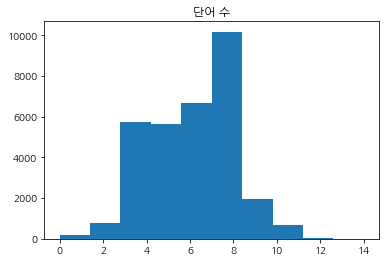

In [ ]:
# 최대 길이에 맞춰서 패딩을 삽입
maxLen = 14
x_train = tf.keras.preprocessing.sequence.pad_sequences( x_train, maxlen = maxLen )
y_train = np.asarray( y_train )

x_validation = tf.keras.preprocessing.sequence.pad_sequences( x_validation, maxlen = maxLen )
y_validation = np.asarray( y_validation )

## Conv넷

In [ ]:
# 종속변수 데이터 전처리
y_train = to_categorical(y_train) # Y_train 에 원-핫 인코딩
print(y_train)
print(y_train.shape)

In [ ]:
embedding_dim = 100
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxLen))
model.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dense(7, activation='softmax'))

model.compile(
  loss='categorical_crossentropy',
  metrics = ['acc'],
  optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
)

In [ ]:
hist = model.fit( x_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 50/50
200/200 [==============================] - 1s 6ms/step - loss: 0.1808 - acc: 0.9422 - val_loss: 0.5635 - val_acc: 0.8271

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['acc'], label='train accuracy')
plt.plot(hist.history['val_acc'], label='validation accuracy')
plt.legend()

plt.show()

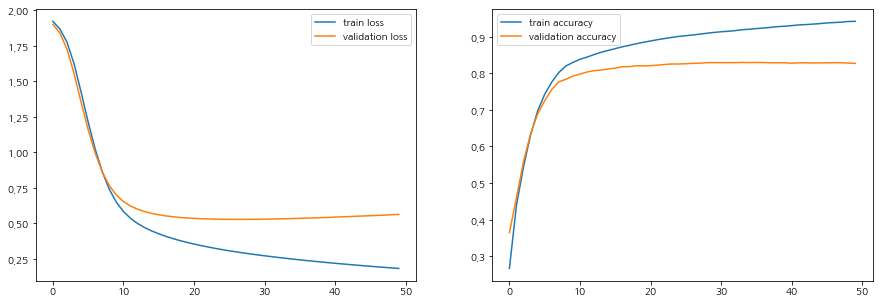

## 정리
- 한자, 영어를 처리한 데이터의 정확도는 0.8408
- 한자, 영어를 처리하지 않은 데이터의 정확도는 0.8271

# 비지도 학습

- 더 나아가 비지도 학습 진행
- 비지도 학습을 통해서 분류된 토픽이 실제로 우리가 생각한 7가지 토픽으로 잘 분류가 되는지 확인

## 토크나이징
- 기존과 동일하게 원핫 방식으로 토크나이징을 진행함

In [ ]:
test_token = []
for line in test.title:
    pre = [word for word in okt.morphs(line, stem=True, norm=True) if word not in stopwords]
    test_token.append(pre)

In [ ]:
x_test = [ line for line in test_token if len(line) > 1]

In [ ]:
total_cnt = len(tokenizer.word_index)
total_freq = 0

rare_cnt = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < 3:
        rare_cnt += 1
        rare_freq += value

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_test)
x_test2 = tokenizer.texts_to_sequences(x_test)
one_hot_encoded = tokenizer.texts_to_matrix(x_test, mode='binary')
print(one_hot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 1.]]


In [ ]:
one_hot_encoded.shape

(9131, 14203)

## Agglomerative

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward

In [ ]:
aggModel = AgglomerativeClustering( n_clusters=7, linkage='ward', affinity='euclidean').fit(one_hot_encoded)
agg_labels = aggModel.fit_predict(one_hot_encoded)

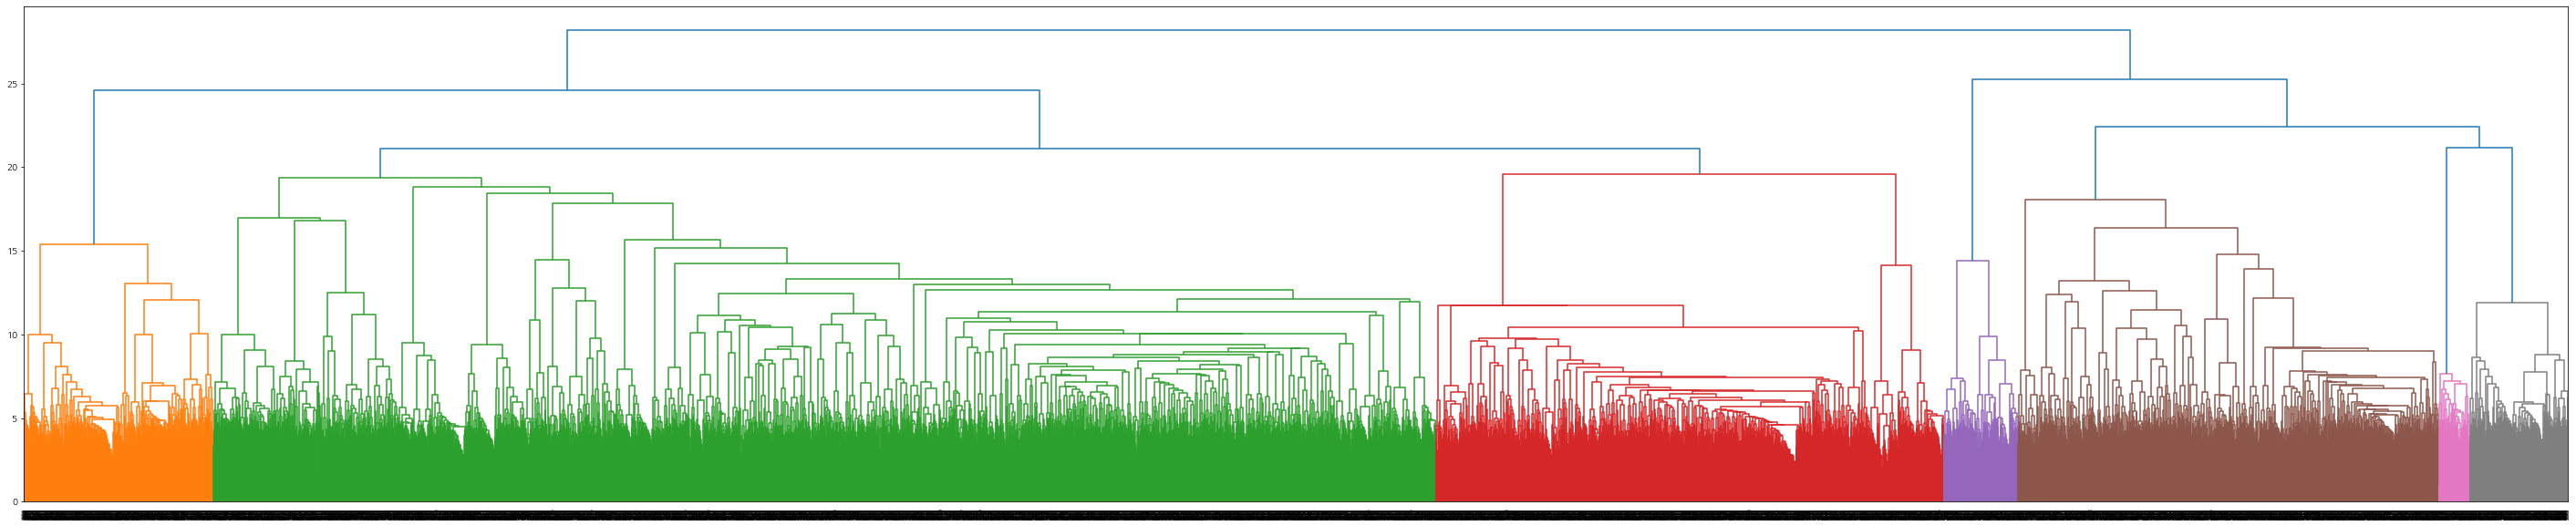

In [ ]:
plt.figure( figsize=(50, 10))
test_linkage = ward(one_hot_encoded)
dendrogram( test_linkage)
plt.show()

In [ ]:
agg_labels.reshape(-1,1)

array([[0],
       [1],
       [2],
       ...,
       [1],
       [0],
       [2]])

- 이러한 방향으로 분류가 되는 듯함 
 - 0 : 경제
 - 1: 스포츠
 - 2: 생활문화
 - 3: 세계
 - 4: 사회 
 - 5: IT과학
 - 6: 정치

- 특히 사회, IT과학, 정치 분야는 잘 분류하는 것으로 보여짐

In [ ]:
# 원래 분류했던 토픽 순서대로 분류하기
test['topic_idx'] = np.where(test.agg_labels == 0, 1,
                             np.where(test.agg_labels == 6, 6,
                                     np.where(test.agg_labels == 5, 0,
                                             np.where(test.agg_labels == 4, 2,
                                                     np.where(test.agg_labels == 3, 4,
                                                             np.where(test.agg_labels == 2, 3, 5))))))

In [ ]:
# IT과학
test[test['agg_labels'] ==5][50:100]

,index,title,agg_labels,topic_idx
4360,50014,원격으로 자동차 운전한다…LGU 5G 체험관 오픈,5,1
4593,50247,KT 3GPP 5G 표준 완성으로 5G 상용화 준비,5,1
4605,50259,KT 5G 데이터 완전무제한 요금제 출시…5G 1등 되겠다,5,1
4625,50279,SKT·KT MWC 상하이 참가… IoT·5G 리더십 경쟁,5,1
4665,50319,KT 5G 체험,5,1
4679,50333,KT 5G 오픈랩 개소…5G 생태계 활성화해 첫 상용화 성공,5,1
4746,50400,SKT 5G AR·VR 서비스 3종 출시,5,1
4834,50488,차세대 통신 5G 전송량 LTE의 5배 속도는 4050배 빨라,5,1
4879,50533,돈되는 신사업에 힘 싣는다…통신3사 5G·AI 조직 확대,5,1
4979,50633,한국 5G 통신 중심국 부상…글로벌 IT기업들 몰려온다,5,1


In [ ]:
# 정치
test[test['agg_labels'] ==6][50:100]

,index,title,agg_labels,topic_idx
1379,47033,평양정상회담 문 대통령 내외 백두산으로,6,6
1418,47072,광화문 대통령 시대 위원회 구성 착수…위원장 유홍준 내정,6,6
1420,47074,이총리 조코위 인니 대통령 4차례 만남…교민들 덕분,6,6
1484,47138,朴대통령 24일 장·차관 워크숍…북핵위기 국정동력 모색,6,6
1508,47162,朴대통령 13일 국회 개원연설할 듯…협치불씨 살릴까,6,6
1528,47182,朴대통령與지도부 김영란법 농축수산물 규제완화 필요성 공감,6,6
1532,47186,문 대통령 올림픽·패럴림픽 성공적으로 끝나…평화 새길 열려,6,6
1579,47233,朴대통령 민생행보 2탄…시간선택제 모범기업 방문,6,6
1608,47262,르완다 대학살 25주년…대통령 어두운 역사 반복 없다,6,6
1702,47356,朴대통령 국회가 다 막고 어떻게 국민지지 호소하는가,6,6


# 결론
- 단어를 더 일반화된 형태로 처리하기 위해 프로젝트 기간의 절반 이상을 데이터 전처리 하는 데에 사용함
- 그럼에도 프로젝트 시간이 많이 부족했기에 완벽하게 처리가 되진 않음
- 또한 수업 시간 내 배운 딥러닝만 가지고 좋은 모형을 만들어 보고 싶었지만 한계를 느낌
- 데이터 구성이 특성상 단어수 자체가 적어 전처리 후에는 예측에 활용할 데이터 자체가 남기 어려움
- 유의미한 단어들이 최대한 유지되야하는 방법과 데이터의 수를 늘릴수 있는 방법이 추가적으로 검토되야 할 것
- 프로젝트 기한이 좀 더 길었다면 다양한 방법으로 모델을 만들어 볼 수 있었을 것 같아 아쉬움
- 한국어 데이터셋을 바탕으로 사전 학습된 KoBert 모델을 이용해 더 좋은 결과를 낼 수 있을 것으로 예상됨

# 후기


> 김주희 

어려움이 많았지만 그럼에도 불구하고 잘 마무리된 것 같습니다. 분석 과정 중 전처리가 가장 중요하다는걸 다시 알게된 프로젝트였습니다.

> 유현욱

프로젝트를 진행하면서 부족했던 많은 부분들을 조원분들과 소통하면서 배울 수 있었습니다. 프로젝트에 대한 걱정이 많았는데 조원분들과 의견 나누면서 문제 해결을 위해 노력해가는 과정에서 다음 프로젝트에 대한 불안감이 조금은 사라졌습니다. 강사님으로부터도 많은 도움을 받은 것 같아서 잘 마무리 할 수 있었습니다.

> 이민형

당장 배운 인공지능에 대해 익숙해지는 시간이 부족하였고 이를 하드코딩을 통해 보강하고자 하였으며 그만큼 시간이 더 부족하였을 것입니다.
이번 프로젝트를 통해 추후에 유사 프로젝트를 진행할 때에는 보다 뚜렷한 인사이트를 마련해줄 양분이 되었을 것으로 생각합니다.


> 황희원

후반부에 결과물이 그렇게 좋지 않아서 걱정을 좀 했는데, 다들 고생한 만큼 결과가 잘 나온 것 같습니다. 시간만 더 많았더라면 다양한 모델을 시도해봤을 텐데 아쉬움이 남습니다. 부족한 시간임에도 조원분들이 정말 열심히 해주셔서 감사했습니다!



